<a href="https://colab.research.google.com/github/Al-Masrafi/COLAB-CODE/blob/main/Assignment_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/mit-bih-arrhythmia-database")

print("Path to dataset files:", path)

100%|██████████| 73.4M/73.4M [00:03<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1


In [2]:
import os

ds_path = "/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1"  # adjust if different
print("Exists:", os.path.exists(ds_path))
# list top-level
for root, dirs, files in os.walk(ds_path):
    print(root)
    print("  dirs:", dirs[:10])
    print("  files:", files[:10])
    break

# If files are many, list some examples:
print("\nExample file list (first 50):")
print(os.listdir(ds_path)[:50])

Exists: True
/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1
  dirs: ['mit-bih-arrhythmia-database-1.0.0']
  files: []

Example file list (first 50):
['mit-bih-arrhythmia-database-1.0.0']


In [3]:
!pip install wfdb --quiet

import wfdb
record_id = '100'   # change to your chosen record
# adjust if files are nested differently
rec_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0', record_id)

# If the record is directly in dataset folder use:
# rec = wfdb.rdrecord(os.path.join(ds_path, record_id))
# But often Kaggle stores separate files: e.g., '100.dat','100.hea'
rec = wfdb.rdrecord(rec_path)
sig = rec.p_signal  # shape (N, channels)
fs = rec.fs
print("Loaded record", record_id, "fs=", fs, "shape=", sig.shape)
# prefer MLII (often channel name 'MLII') or first channel:
channel_names = rec.sig_name
print("channels:", channel_names)
# choose channel index
ch_idx = 0 if 'MLII' not in channel_names else channel_names.index('MLII')
ecg = sig[:int(5*60*fs), ch_idx]  # first 5 minutes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
Loaded record 100 fs= 360 shape= (650000, 2)
channels: ['MLII', 'V5']


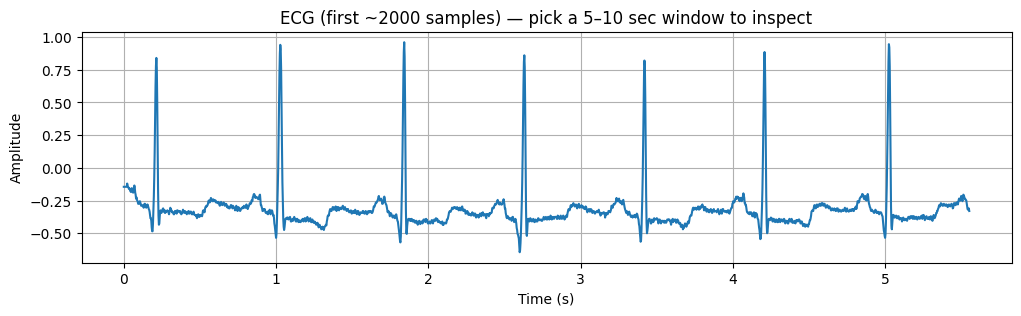

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(len(ecg))/fs
plt.figure(figsize=(12,3))
plt.plot(t[:2000], ecg[:2000])
plt.title("ECG (first ~2000 samples) — pick a 5–10 sec window to inspect")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


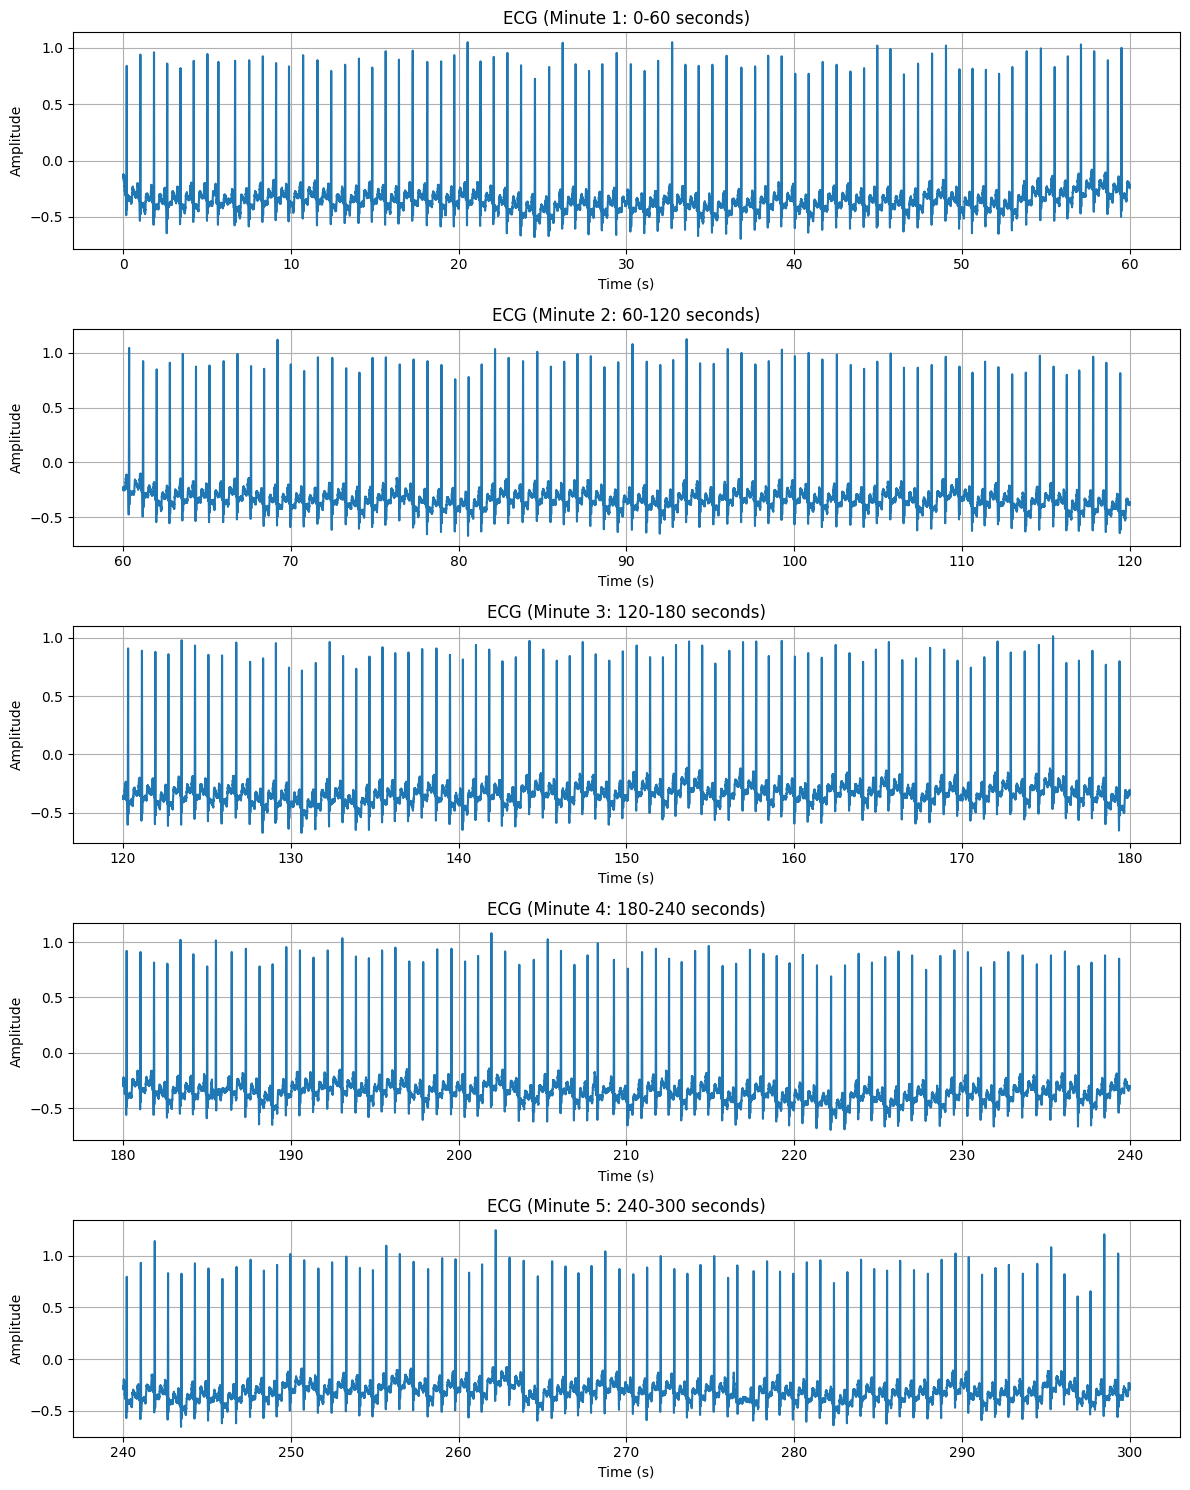

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate time vector
t = np.arange(len(ecg))/fs

# Create a figure with 5 subplots
plt.figure(figsize=(12, 15)) # Adjust figure size as needed

# Plot 5 segments of 1 minute each
for i in range(5):
    start_time = i * 60
    end_time = (i + 1) * 60

    # Calculate start and end indices for the current segment
    start_idx = int(start_time * fs)
    end_idx = int(end_time * fs)

    # Ensure indices do not exceed the signal length
    if start_idx >= len(ecg):
        break
    end_idx = min(end_idx, len(ecg))

    # Extract the segment
    ecg_segment = ecg[start_idx:end_idx]
    t_segment = t[start_idx:end_idx]

    # Create a subplot
    plt.subplot(5, 1, i + 1) # 5 rows, 1 column, current plot index

    # Plot the segment
    plt.plot(t_segment, ecg_segment)

    # Add title and labels
    plt.title(f"ECG (Minute {i+1}: {start_time}-{end_time} seconds)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

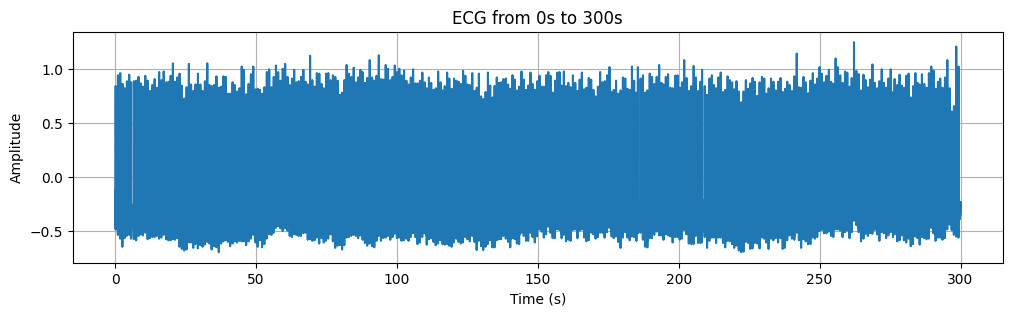

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end times for the plot in seconds
start_time = 0  # Example: Start at 10 seconds
end_time = 300    # Example: End at 20 seconds

# Calculate the start and end indices based on the sampling rate (fs)
start_idx = int(start_time * fs)
end_idx = int(end_time * fs)

# Ensure indices are within the bounds of the ecg signal
start_idx = max(0, start_idx)
end_idx = min(len(ecg), end_idx)

# Extract the segment of the ECG signal
ecg_segment = ecg[start_idx:end_idx]

# Create a time vector for the extracted segment
t_segment = np.arange(len(ecg_segment)) / fs + start_time

# Plot the segment
plt.figure(figsize=(12, 3))
plt.plot(t_segment, ecg_segment)
plt.title(f"ECG from {start_time}s to {end_time}s")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

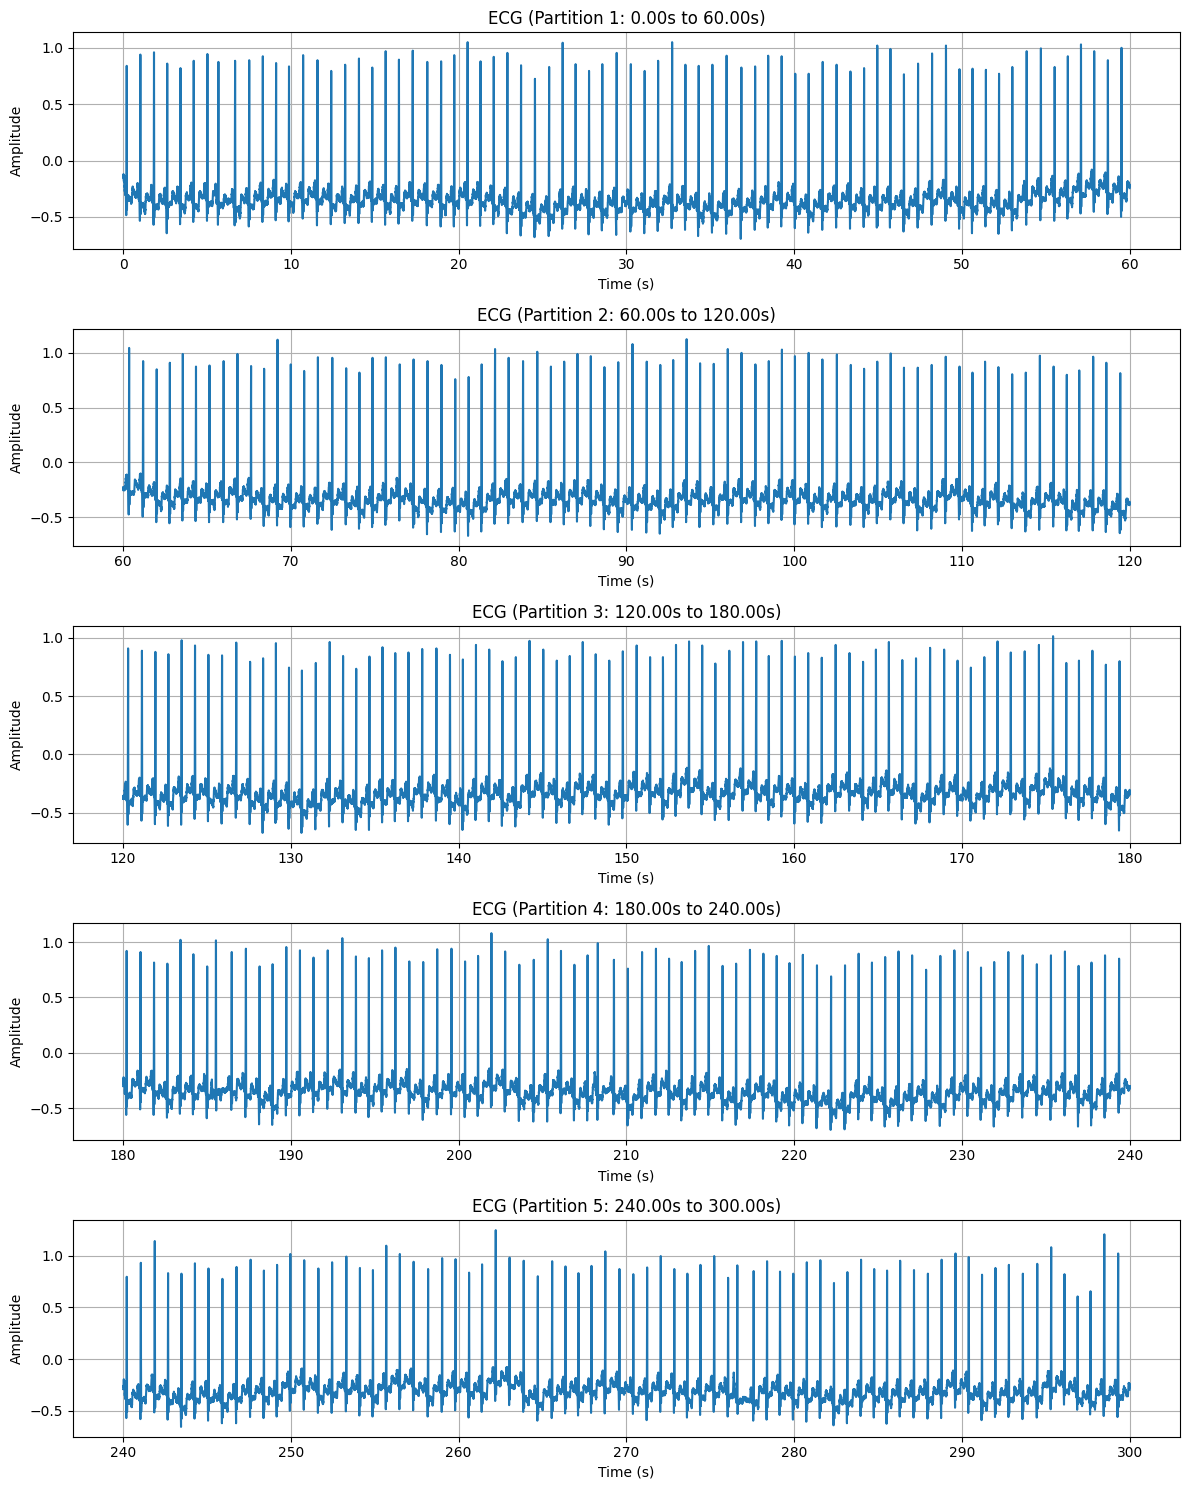

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the start time, end time, and number of partitions
start_time = 0  # Example: Start at 0 seconds
end_time = 300    # Example: End at 300 seconds
partitions = 5  # Example: Divide into 5 partitions

# Calculate the total duration
total_duration = end_time - start_time

# Calculate the duration of each partition
partition_duration = total_duration / partitions

# Create a figure with subplots for each partition
plt.figure(figsize=(12, partitions * 3)) # Adjust figure size based on the number of partitions

# Iterate through the partitions and plot each one
for i in range(partitions):
    # Calculate the start and end time for the current partition
    current_start_time = start_time + i * partition_duration
    current_end_time = start_time + (i + 1) * partition_duration

    # Calculate the start and end indices for the current partition
    start_idx = int(current_start_time * fs)
    end_idx = int(current_end_time * fs)

    # Ensure indices are within the bounds of the ecg signal
    start_idx = max(0, start_idx)
    end_idx = min(len(ecg), end_idx)

    # Extract the segment of the ECG signal for the current partition
    ecg_segment = ecg[start_idx:end_idx]

    # Create a time vector for the extracted segment
    t_segment = np.arange(len(ecg_segment)) / fs + current_start_time

    # Create a subplot for the current partition
    plt.subplot(partitions, 1, i + 1) # Number of rows = partitions, 1 column

    # Plot the segment
    plt.plot(t_segment, ecg_segment)

    # Add title and labels
    plt.title(f"ECG (Partition {i+1}: {current_start_time:.2f}s to {current_end_time:.2f}s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the start time, end time, and number of partitions
start_time = 0  # Example: Start at 0 seconds
end_time = 300    # Example: End at 300 seconds
partitions = 10  # Example: Divide into 5 partitions

# Define the folder name to save the plots
output_folder = "ecg_partitions"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Calculate the total duration
total_duration = end_time - start_time

# Calculate the duration of each partition
partition_duration = total_duration / partitions

# Iterate through the partitions and plot each one
for i in range(partitions):
    # Calculate the start and end time for the current partition
    current_start_time = start_time + i * partition_duration
    current_end_time = start_time + (i + 1) * partition_duration

    # Calculate the start and end indices for the current partition
    start_idx = int(current_start_time * fs)
    end_idx = int(current_end_time * fs)

    # Ensure indices are within the bounds of the ecg signal
    start_idx = max(0, start_idx)
    end_idx = min(len(ecg), end_idx)

    # Extract the segment of the ECG signal for the current partition
    ecg_segment = ecg[start_idx:end_idx]

    # Create a time vector for the extracted segment
    t_segment = np.arange(len(ecg_segment)) / fs + current_start_time

    # Create a new figure for each partition
    plt.figure(figsize=(12, 3))

    # Plot the segment
    plt.plot(t_segment, ecg_segment)

    # Add title and labels
    plt.title(f"ECG (Partition {i+1}: {current_start_time:.2f}s to {current_end_time:.2f}s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Define the filename for the current partition
    filename = os.path.join(output_folder, f"partition_{i+1}.png")

    # Save the figure
    plt.savefig(filename, format="png", dpi=300)

    # Close the figure to free up memory
    plt.close()

print(f"Saved {partitions} partitions to the '{output_folder}' folder.")

Saved 10 partitions to the 'ecg_partitions' folder.


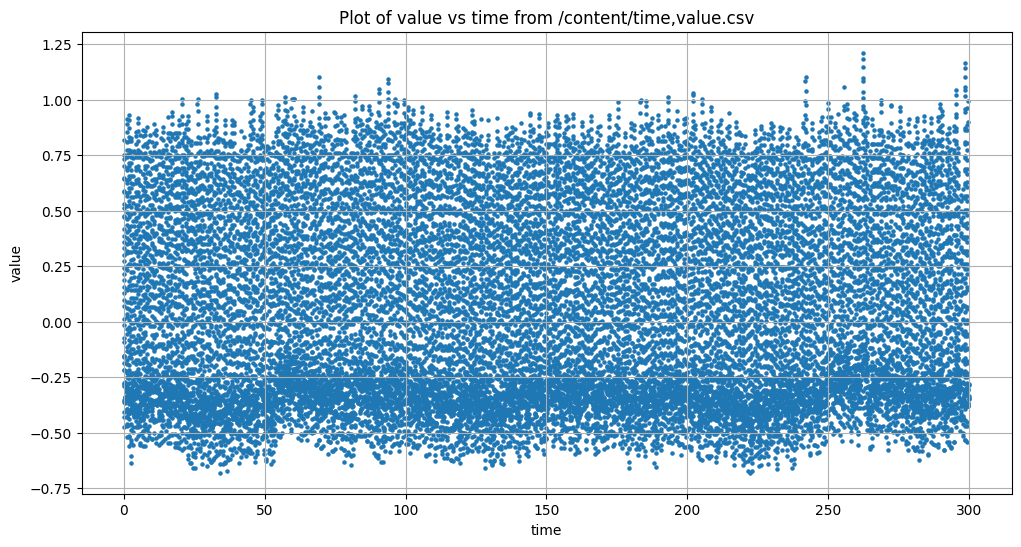

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = '/content/time,value.csv'

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)

    # Ensure the column names are correct (assuming they are 'time' and 'value')
    # You can print df.columns to verify if needed
    time_column = 'time'
    value_column = 'value'

    # Check if the required columns exist
    if time_column in df.columns and value_column in df.columns:
        # Create a scatter plot
        plt.figure(figsize=(12, 6))
        plt.scatter(df[time_column], df[value_column], s=5) # Using scatter plot with small markers
        plt.xlabel(time_column)
        plt.ylabel(value_column)
        plt.title(f'Plot of {value_column} vs {time_column} from {file_path}')
        plt.grid(True)
        plt.show()
    else:
        print(f"Error: Required columns ('{time_column}' and '{value_column}') not found in the CSV file.")
        print("Available columns:", df.columns.tolist())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

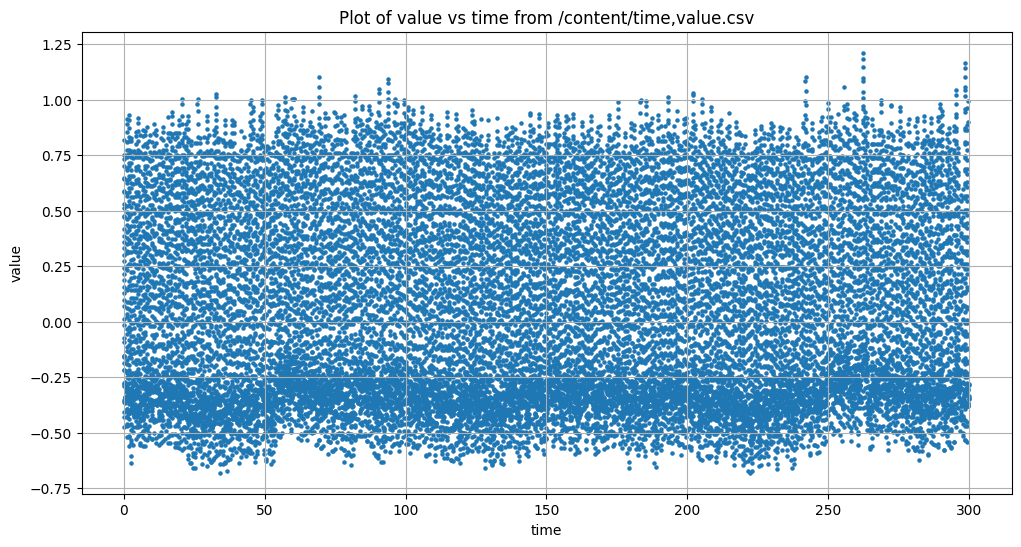

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = '/content/time,value.csv'

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)

    # Ensure the column names are correct (assuming they are 'time' and 'value')
    # You can print df.columns to verify if needed
    time_column = 'time'
    value_column = 'value'

    # Check if the required columns exist
    if time_column in df.columns and value_column in df.columns:
        # Create a scatter plot
        plt.figure(figsize=(12, 6))
        plt.scatter(df[time_column], df[value_column], s=5) # Using scatter plot with small markers
        plt.xlabel(time_column)
        plt.ylabel(value_column)
        plt.title(f'Plot of {value_column} vs {time_column} from {file_path}')
        plt.grid(True)
        plt.show()
    else:
        print(f"Error: Required columns ('{time_column}' and '{value_column}') not found in the CSV file.")
        print("Available columns:", df.columns.tolist())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

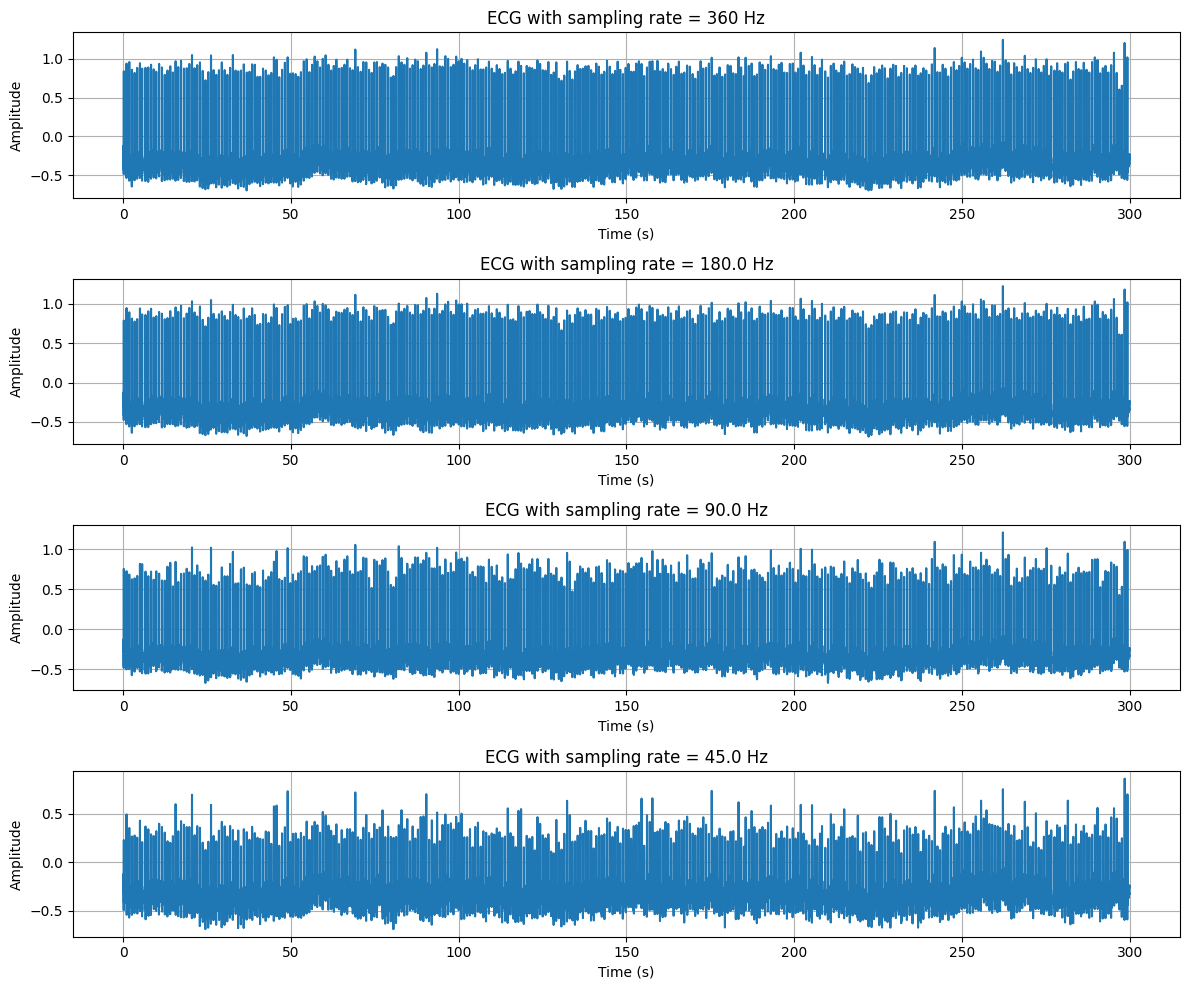

In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Original sampling rate and signal
original_fs = fs
original_ecg = ecg

plt.figure(figsize=(12, 10))

current_ecg = original_ecg
current_fs = original_fs

for i in range(4):
    plt.subplot(4, 1, i + 1)
    t = np.arange(len(current_ecg)) / current_fs
    plt.plot(t, current_ecg)
    plt.title(f"ECG with sampling rate = {current_fs} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Downsample the signal by a factor of 2 for the next iteration
    if i < 3:
        downsampling_factor = 2
        current_ecg = scipy.signal.decimate(current_ecg, downsampling_factor)
        current_fs = current_fs / downsampling_factor

plt.tight_layout()
plt.show()

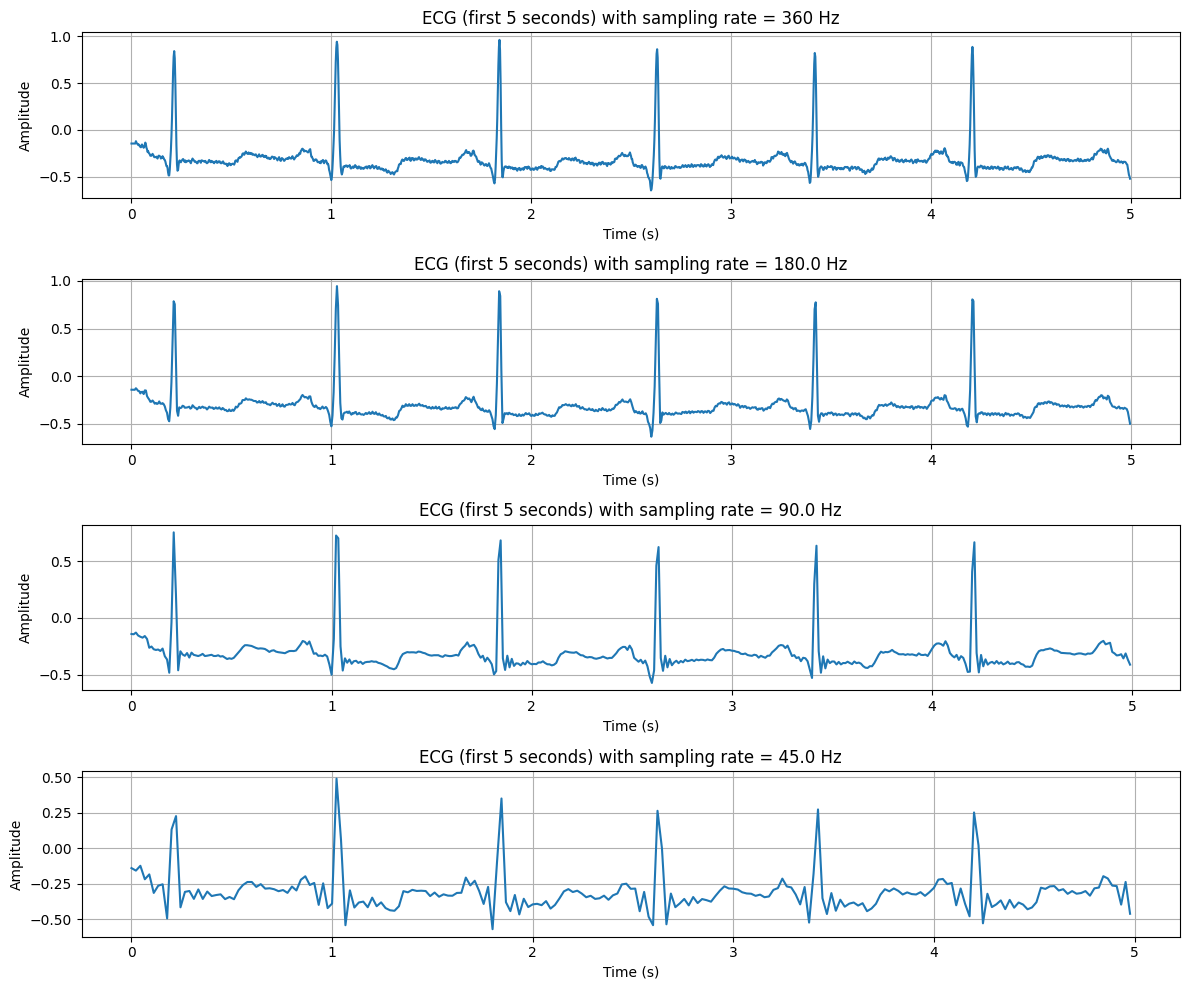

In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Original sampling rate and signal
original_fs = fs
original_ecg = ecg

plt.figure(figsize=(12, 10))

current_ecg = original_ecg
current_fs = original_fs

for i in range(4):
    plt.subplot(4, 1, i + 1)
    t = np.arange(len(current_ecg)) / current_fs
    # Plot only the first 5 seconds
    plt.plot(t[:int(5*current_fs)], current_ecg[:int(5*current_fs)])
    plt.title(f"ECG (first 5 seconds) with sampling rate = {current_fs} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Downsample the signal by a factor of 2 for the next iteration
    if i < 3:
        downsampling_factor = 2
        current_ecg = scipy.signal.decimate(current_ecg, downsampling_factor)
        current_fs = current_fs / downsampling_factor

plt.tight_layout()
plt.show()

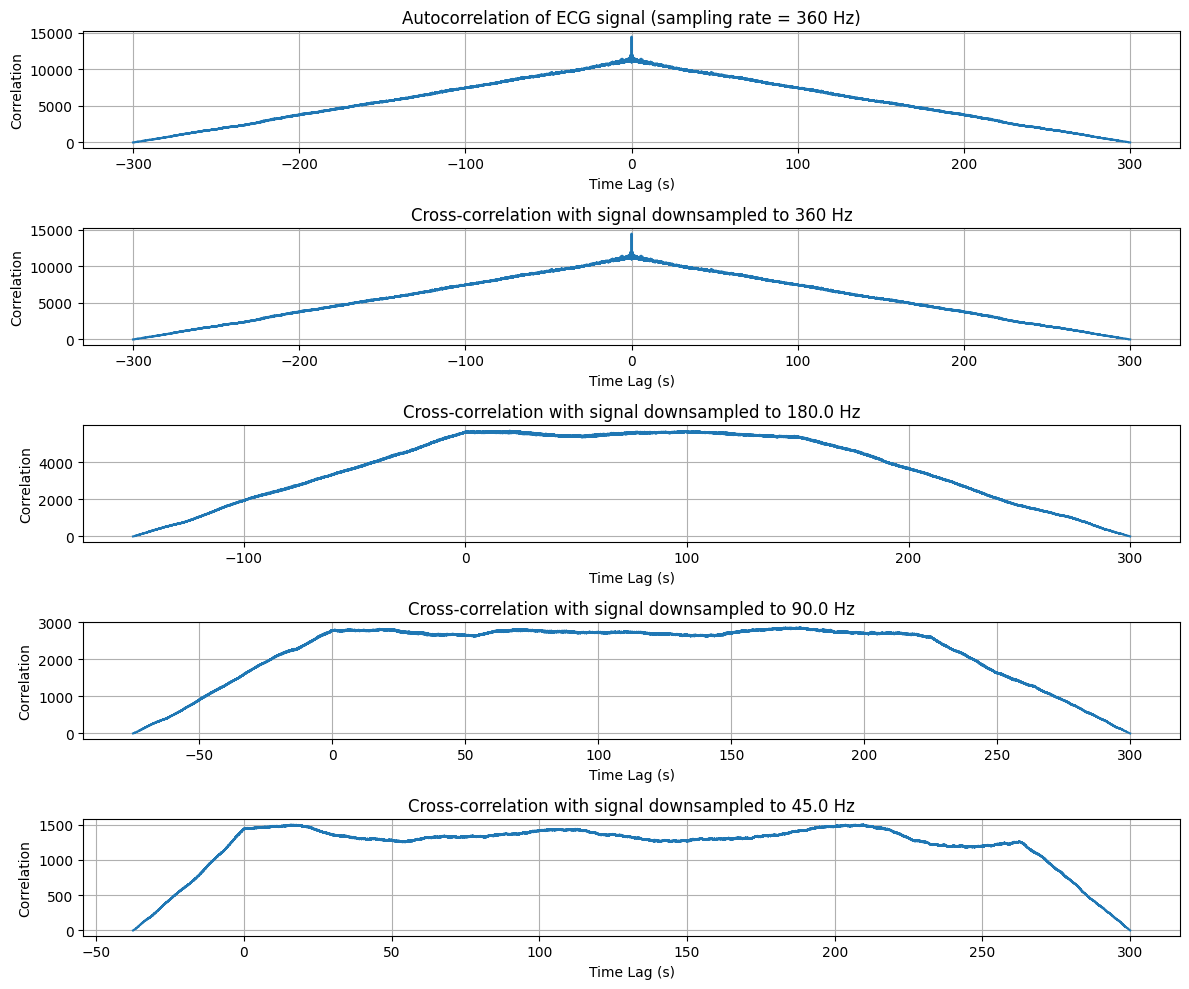

In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Original sampling rate and signal
original_fs = fs
original_ecg = ecg

plt.figure(figsize=(12, 10))

current_ecg = original_ecg
current_fs = original_fs

# Plot autocorrelation (cross-correlation with itself)
plt.subplot(5, 1, 1) # Added subplot for autocorrelation
correlation = scipy.signal.correlate(original_ecg, original_ecg, mode='full')
lags = scipy.signal.correlation_lags(original_ecg.size, original_ecg.size, mode='full')
plt.plot(lags / original_fs, correlation)
plt.title(f"Autocorrelation of ECG signal (sampling rate = {original_fs} Hz)")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid(True)


for i in range(4):
    plt.subplot(5, 1, i + 2) # Adjusted subplot index
    # Calculate cross-correlation
    correlation = scipy.signal.correlate(original_ecg, current_ecg, mode='full')

    # Time lag array for the cross-correlation
    lags = scipy.signal.correlation_lags(original_ecg.size, current_ecg.size, mode='full')

    plt.plot(lags / original_fs, correlation) # Plot lags in seconds
    plt.title(f"Cross-correlation with signal downsampled to {current_fs} Hz")
    plt.xlabel("Time Lag (s)")
    plt.ylabel("Correlation")
    plt.grid(True)

    # Downsample the signal by a factor of 2 for the next iteration
    if i < 3:
        downsampling_factor = 2
        current_ecg = scipy.signal.decimate(current_ecg, downsampling_factor)
        current_fs = current_fs / downsampling_factor

plt.tight_layout()
plt.show()

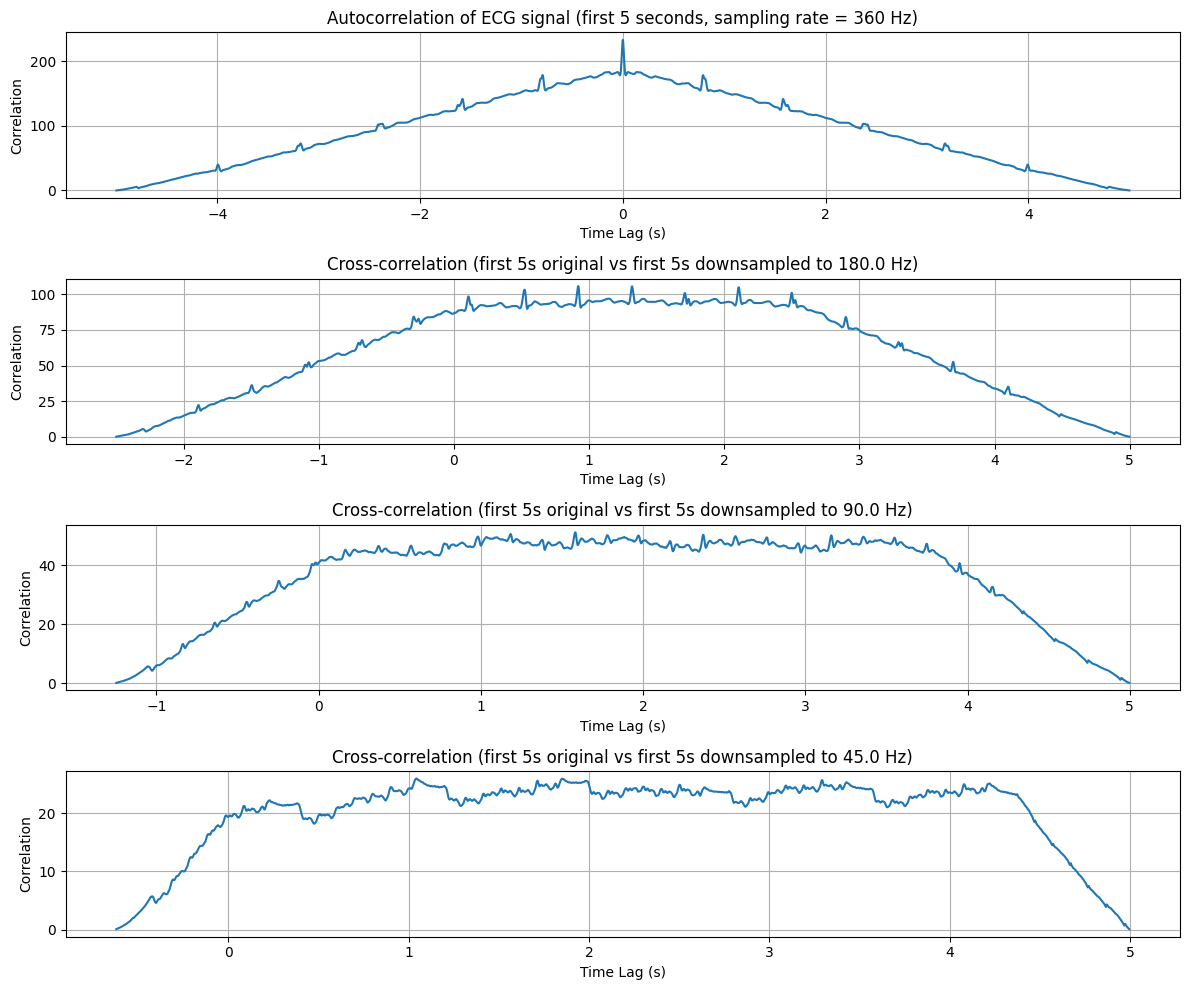

In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Original sampling rate and signal (first 5 seconds)
original_fs = fs
original_ecg_5s = ecg[:int(5*fs)]

plt.figure(figsize=(12, 10))

# Autocorrelation of the first 5 seconds of the original signal
plt.subplot(4, 1, 1)
correlation_auto = scipy.signal.correlate(original_ecg_5s, original_ecg_5s, mode='full')
lags_auto = scipy.signal.correlation_lags(original_ecg_5s.size, original_ecg_5s.size, mode='full')
plt.plot(lags_auto / original_fs, correlation_auto) # Plot lags in seconds
plt.title(f"Autocorrelation of ECG signal (first 5 seconds, sampling rate = {original_fs} Hz)")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid(True)

current_ecg = original_ecg_5s
current_fs = original_fs

for i in range(3):
    downsampling_factor = 2
    # Downsample the *entire* original signal first, then take the first 5 seconds
    # This ensures correct downsampling across the initial segment
    current_ecg = scipy.signal.decimate(ecg, downsampling_factor**(i+1))
    current_fs = original_fs / (downsampling_factor**(i+1))

    # Take the first 5 seconds of the downsampled signal
    current_ecg_5s = current_ecg[:int(5*current_fs)]

    # Cross-correlation between the first 5 seconds of original and downsampled signals
    correlation_cross = scipy.signal.correlate(original_ecg_5s, current_ecg_5s, mode='full')

    # Time lag array for the cross-correlation
    lags_cross = scipy.signal.correlation_lags(original_ecg_5s.size, current_ecg_5s.size, mode='full')

    plt.subplot(4, 1, i + 2)
    # Plot lags in seconds relative to the original sampling rate
    plt.plot(lags_cross / original_fs, correlation_cross)
    plt.title(f"Cross-correlation (first 5s original vs first 5s downsampled to {current_fs} Hz)")
    plt.xlabel("Time Lag (s)")
    plt.ylabel("Correlation")
    plt.grid(True)


plt.tight_layout()
plt.show()

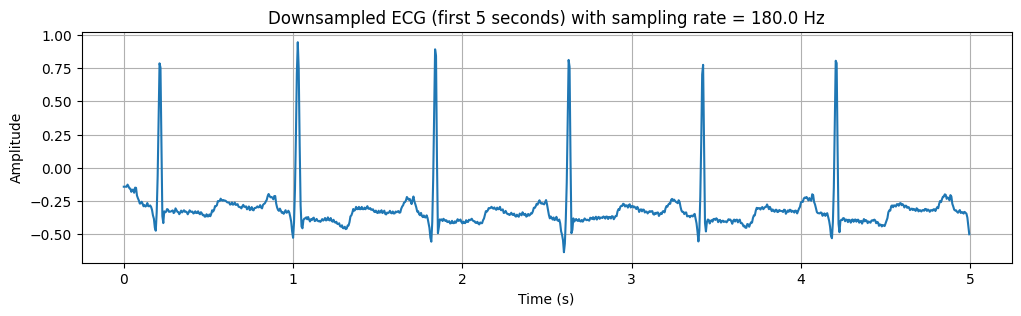

In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Original sampling rate and signal
original_fs = fs
original_ecg = ecg

# Downsample the signal by a factor of 2
downsampling_factor = 2
downsampled_ecg = scipy.signal.decimate(original_ecg, downsampling_factor)
downsampled_fs = original_fs / downsampling_factor

# Plot the first 5 seconds of the downsampled signal
t = np.arange(len(downsampled_ecg)) / downsampled_fs
plt.figure(figsize=(12, 3))
plt.plot(t[:int(5 * downsampled_fs)], downsampled_ecg[:int(5 * downsampled_fs)])
plt.title(f"Downsampled ECG (first 5 seconds) with sampling rate = {downsampled_fs} Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

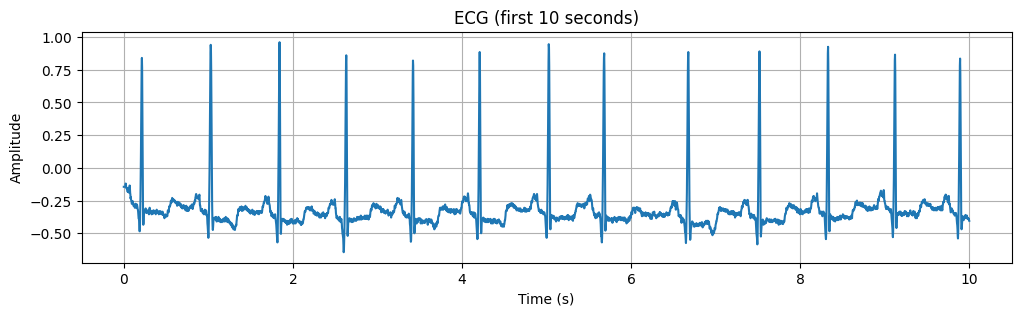

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(len(ecg))/fs
plt.figure(figsize=(12,3))
plt.plot(t[:int(10*fs)], ecg[:int(10*fs)])
plt.title("ECG (first 10 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Save the figure as a high-quality vector graphic (PDF)
plt.savefig("ecg_10s.pdf", format="pdf", dpi=300)

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/Default Dataset.csv')
    print("DataFrame loaded successfully. First 5 rows:")
    display(df.head())
    print("\nColumns in the DataFrame:")
    print(df.columns)
except FileNotFoundError:
    print("Error: The file '/content/Default Dataset.csv' was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Error: The file '/content/Default Dataset.csv' was not found.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming df_plot_data is already loaded and contains 'x' and ' y' columns
# Sort the data by the x-values to ensure correct interpolation
df_sorted = df_plot_data.sort_values(by='x')

# Remove duplicate x-values, keeping the first occurrence
df_unique_x = df_sorted.drop_duplicates(subset=['x'])

# Extract x and y values from the DataFrame with unique x-values
x_orig = df_unique_x['x'].values
y_orig = df_unique_x[' y'].values

# Create the cubic interpolation function
f_cubic = interp1d(x_orig, y_orig, kind='cubic')

# Generate new x values for the interpolated curve (a finer grid)
x_new = np.linspace(x_orig.min(), x_orig.max(), 500)

# Calculate the interpolated y values
y_cubic = f_cubic(x_new)

# Plot the original data and the interpolated curve
plt.figure(figsize=(12, 6))
plt.scatter(x_orig, y_orig, label='Original Data (unique x)', s=10)
plt.plot(x_new, y_cubic, label='Cubic Interpolation', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Interpolation of Data from plot-data (3).csv (Duplicates Removed)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_plot_data' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming df_plot_data is already loaded and contains 'x' and ' y' columns
# Sort the data by the x-values to ensure correct interpolation
df_sorted = df_plot_data.sort_values(by='x')

# Remove duplicate x-values, keeping the first occurrence
df_unique_x = df_sorted.drop_duplicates(subset=['x'])

# Extract x and y values from the DataFrame with unique x-values
x_orig = df_unique_x['x'].values
y_orig = df_unique_x[' y'].values

# Create the interpolation functions
f_cubic = interp1d(x_orig, y_orig, kind='cubic')
f_linear = interp1d(x_orig, y_orig, kind='linear')

# Generate new x values for the interpolated curves (a finer grid)
x_new = np.linspace(x_orig.min(), x_orig.max(), 500)

# Calculate the interpolated y values
y_cubic = f_cubic(x_new)
y_linear = f_linear(x_new)

# Plot the original data and the interpolated curves
plt.figure(figsize=(12, 6))
plt.scatter(x_orig, y_orig, label='Original Data (unique x)', s=10, zorder=5) # zorder to ensure points are on top
plt.plot(x_new, y_cubic, label='Cubic Interpolation', color='red')
plt.plot(x_new, y_linear, label='Linear Interpolation', color='green', linestyle='--') # Use a different linestyle for clarity
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic and Linear Interpolation of Data from plot-data (3).csv (Duplicates Removed)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming df_plot_data is already loaded and contains 'x' and ' y' columns
# Sort the data by the x-values to ensure correct interpolation
df_sorted = df_plot_data.sort_values(by='x')

# Remove duplicate x-values, keeping the first occurrence
df_unique_x = df_sorted.drop_duplicates(subset=['x'])

# Extract x and y values from the DataFrame with unique x-values
x_orig = df_unique_x['x'].values
y_orig = df_unique_x[' y'].values

# Create the linear interpolation function
f_linear = interp1d(x_orig, y_orig, kind='linear')

# Generate new x values for the interpolated curve (a finer grid)
x_new = np.linspace(x_orig.min(), x_orig.max(), 500)

# Calculate the interpolated y values
y_linear = f_linear(x_new)

# Plot the original data and the interpolated curve
plt.figure(figsize=(12, 6))
plt.scatter(x_orig, y_orig, label='Original Data (unique x)', s=10)
plt.plot(x_new, y_linear, label='Linear Interpolation', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation of Data from plot-data (3).csv (Duplicates Removed)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

try:
    df_default_2 = pd.read_csv('/content/Default Dataset (2).csv')
    print("DataFrame loaded successfully. First 5 rows:")
    display(df_default_2.head())
    print("\nColumns in the DataFrame:")
    print(df_default_2.columns)
except FileNotFoundError:
    print("Error: The file '/content/Default Dataset (2).csv' was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

In [ ]:
import matplotlib.pyplot as plt

# Ensure the column names are exactly as they appear in df_default_2.columns
x_column = '0'
y_column = ' -0.29763753901518375'

plt.figure(figsize=(12, 6))
plt.scatter(df_default_2[x_column], df_default_2[y_column], s=5) # Using scatter plot with small markers
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Plot of manual tracing')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd # Import pandas

# Load df_plot_data if it's not already defined
try:
    df_plot_data.head() # Check if df_plot_data exists
    print("df_plot_data is already loaded.")
except NameError:
    print("df_plot_data not found, loading from CSV.")
    try:
        df_plot_data = pd.read_csv('/content/plot-data (3).csv')
        print("DataFrame loaded successfully.")
    except FileNotFoundError:
        print("Error: The file '/content/plot-data (3).csv' was not found.")
        # Exit the cell execution if the file is not found
        raise
    except Exception as e:
        print(f"An error occurred while reading the CSV file: {e}")
        # Exit the cell execution if there's another error
        raise


# Assuming df_plot_data is now loaded and contains 'x' and ' y' columns
# Sort the data by the x-values to ensure correct interpolation
df_sorted = df_plot_data.sort_values(by='x')

# Remove duplicate x-values, keeping the first occurrence
df_unique_x = df_sorted.drop_duplicates(subset=['x'])

# Extract x and y values from the DataFrame with unique x-values
x_orig = df_unique_x['x'].values
y_orig = df_unique_x[' y'].values

# Create the cubic interpolation function
f_cubic = interp1d(x_orig, y_orig, kind='cubic')

# Generate new x values for the interpolated curve (a finer grid)
x_new = np.linspace(x_orig.min(), x_orig.max(), 500)

# Calculate the interpolated y values
y_cubic = f_cubic(x_new)

# Plot the original data and the interpolated curve
plt.figure(figsize=(12, 6))
plt.scatter(x_orig, y_orig, label='Original Data (unique x)', s=10)
plt.plot(x_new, y_cubic, label='Cubic Interpolation', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Interpolation of Data from plot-data (3).csv (Duplicates Removed)')
plt.legend()
plt.grid(True)
plt.show()

# Task
Perform cross-correlation between a 5-second segment of a manual tracing signal from "/content/Default Dataset (2).csv" and 5-second segments of the original ECG signal and its downsampled versions, then plot the 5 resulting correlation diagrams.

## Prepare the manual tracing signal

### Subtask:
Extract the first 5 seconds of data from `df_default_2` based on the '0' column as the time axis.


**Reasoning**:
Extract the first 5 seconds of data from the manual tracing DataFrame based on the time column '0'.



In [ ]:
# @title
# Identify the time column name
time_column = '0'

# Filter the DataFrame to include only rows where the time is less than or equal to 5 seconds
df_manual_tracing_5s = df_default_2[df_default_2[time_column] <= 5]

# Display the first few rows of the filtered DataFrame to verify
display(df_manual_tracing_5s.head())

# Print the shape of the filtered DataFrame to see how many data points are in the first 5 seconds
print("Shape of the 5-second manual tracing data:", df_manual_tracing_5s.shape)

## Prepare the original ecg signal

### Subtask:
Ensure the original ECG signal (`ecg`) and its sampling rate (`fs`) are available.


**Reasoning**:
Verify if `ecg` and `fs` are available and rerun the cell if necessary to ensure they are loaded.



In [ ]:
# @title
# Verify if ecg and fs are in the current environment
try:
    # Access the variables to check if they exist
    ecg_shape = ecg.shape
    fs_value = fs
    print(f"ecg variable found with shape: {ecg_shape}")
    print(f"fs variable found with value: {fs_value}")

except NameError:
    print("ecg or fs variables not found. Rerunning cell 0pASHx6sR0JG to load them.")
    # If not found, regenerate the code from cell 0pASHx6sR0JG to load them
    # This assumes the original cell is available and correctly loads ecg and fs
    # and that the necessary imports (wfdb, os) and ds_path are available from previous cells.
    record_id = '100'
    rec_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0', record_id)
    rec = wfdb.rdrecord(rec_path)
    sig = rec.p_signal
    fs = rec.fs
    channel_names = rec.sig_name
    ch_idx = 0 if 'MLII' not in channel_names else channel_names.index('MLII')
    ecg = sig[:int(5*60*fs), ch_idx]
    print("ecg and fs variables loaded after rerunning the cell.")
    print(f"ecg variable shape: {ecg.shape}")
    print(f"fs variable value: {fs}")


**Reasoning**:
The previous attempt to load `ecg` and `fs` failed because `os` was not defined. I need to include the necessary imports (`os`, `wfdb`) and ensure `ds_path` is accessible before attempting to load the data again.



In [ ]:
# @title
import os
import wfdb

# Verify if ecg and fs are in the current environment
try:
    # Access the variables to check if they exist
    ecg_shape = ecg.shape
    fs_value = fs
    print(f"ecg variable found with shape: {ecg_shape}")
    print(f"fs variable found with value: {fs_value}")

except NameError:
    print("ecg or fs variables not found. Loading them now.")
    # Ensure ds_path is defined (assuming it was defined in a previous cell)
    # If ds_path is not defined, this will raise a NameError again.
    # In a real scenario, you might need to add code to define ds_path if it's missing.
    ds_path = "/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1" # Define ds_path if not already defined

    record_id = '100'
    rec_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0', record_id)
    rec = wfdb.rdrecord(rec_path)
    sig = rec.p_signal
    fs = rec.fs
    channel_names = rec.sig_name
    ch_idx = 0 if 'MLII' not in channel_names else channel_names.index('MLII')
    ecg = sig[:int(5*60*fs), ch_idx]
    print("ecg and fs variables loaded.")
    print(f"ecg variable shape: {ecg.shape}")
    print(f"fs variable value: {fs}")

**Reasoning**:
The error indicates that the `wfdb` module is not installed. I need to install it before I can import and use it.



In [ ]:
!pip install wfdb --quiet

**Reasoning**:
The `wfdb` package is now installed. I can retry loading the `ecg` and `fs` variables, ensuring all necessary imports and the `ds_path` variable are available.



In [ ]:
# @title
import os
import wfdb

# Verify if ecg and fs are in the current environment
try:
    # Access the variables to check if they exist
    ecg_shape = ecg.shape
    fs_value = fs
    print(f"ecg variable found with shape: {ecg_shape}")
    print(f"fs variable found with value: {fs_value}")

except NameError:
    print("ecg or fs variables not found. Loading them now.")
    # Ensure ds_path is defined (assuming it was defined in a previous cell)
    # If ds_path is not defined, this will raise a NameError again.
    # In a real scenario, you might need to add code to define ds_path if it's missing.
    ds_path = "/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1" # Define ds_path if not already defined

    record_id = '100'
    rec_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0', record_id)
    rec = wfdb.rdrecord(rec_path)
    sig = rec.p_signal
    fs = rec.fs
    channel_names = rec.sig_name
    ch_idx = 0 if 'MLII' not in channel_names else channel_names.index('MLII')
    ecg = sig[:int(5*60*fs), ch_idx]
    print("ecg and fs variables loaded.")
    print(f"ecg variable shape: {ecg.shape}")
    print(f"fs variable value: {fs}")

**Reasoning**:
The `FileNotFoundError` indicates that the file `100.hea` is not found at the constructed path. This suggests that the `ds_path` or the subdirectory structure within it might be incorrect or has changed. I need to verify the actual path to the record files within the downloaded dataset directory. I will list the contents of the `ds_path` and the subdirectory `mit-bih-arrhythmia-database-1.0.0` to confirm the correct location of the record files.



In [ ]:
# @title
import os

# Assuming ds_path is already defined from previous successful cells
# If not, define it here:
ds_path = "/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1"

print(f"Listing contents of: {ds_path}")
try:
    print(os.listdir(ds_path))
except FileNotFoundError:
    print(f"Error: Directory not found at {ds_path}")

# Construct the path to the expected subdirectory
subdirectory_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0')
print(f"\nListing contents of: {subdirectory_path}")
try:
    print(os.listdir(subdirectory_path))
except FileNotFoundError:
    print(f"Error: Directory not found at {subdirectory_path}")

**Reasoning**:
The directory specified by `ds_path` was not found. This means the path where the dataset was downloaded is incorrect or has changed. I need to re-run the initial download cell to get the correct download path from `kagglehub.dataset_download`.



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/mit-bih-arrhythmia-database")

print("Path to dataset files:", path)

# Update ds_path with the new path
ds_path = path

**Reasoning**:
The dataset has been re-downloaded, and `ds_path` has been updated with the correct path. Now I can proceed to load the `ecg` signal and `fs` using `wfdb`, making sure to handle potential `NameError` for `os` and `wfdb` by including the import statement.



In [ ]:
# @title
import os
import wfdb

# Verify if ecg and fs are in the current environment
try:
    # Access the variables to check if they exist
    ecg_shape = ecg.shape
    fs_value = fs
    print(f"ecg variable found with shape: {ecg_shape}")
    print(f"fs variable found with value: {fs_value}")

except NameError:
    print("ecg or fs variables not found. Loading them now.")
    # ds_path is updated in the previous cell

    record_id = '100'
    rec_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0', record_id)
    rec = wfdb.rdrecord(rec_path)
    sig = rec.p_signal
    fs = rec.fs
    channel_names = rec.sig_name
    ch_idx = 0 if 'MLII' not in channel_names else channel_names.index('MLII')
    ecg = sig[:int(5*60*fs), ch_idx]
    print("ecg and fs variables loaded.")
    print(f"ecg variable shape: {ecg.shape}")
    print(f"fs variable value: {fs}")

## Resample/align the manual tracing signal

### Subtask:
Resample/align the manual tracing signal to a common time base or sampling rate that allows for meaningful cross-correlation with the downsampled ECG signals.


**Reasoning**:
Extract time and signal values from the manual tracing DataFrame, determine the duration and target sampling rate, create a new time vector, and resample the manual tracing signal using linear interpolation.



In [ ]:
# @title
import numpy as np
from scipy.interpolate import interp1d

# 1. Extract time and signal values from the df_manual_tracing_5s DataFrame.
time_orig_manual = df_manual_tracing_5s['0'].values
signal_orig_manual = df_manual_tracing_5s[' -0.29763753901518375'].values

# 2. Determine the time duration of the manual tracing signal segment.
duration_manual = time_orig_manual.max() - time_orig_manual.min()
print(f"Manual tracing signal duration: {duration_manual:.4f} seconds")

# 3. Determine the target sampling rate for resampling.
# The target sampling rate is the original ECG sampling rate (fs)
target_fs = fs
print(f"Target sampling rate for resampling: {target_fs} Hz")

# 4. Create a new time vector for the target sampling rate.
# The number of points in the new time vector will be duration * target_fs + 1 (approximately)
num_points_target = int(duration_manual * target_fs) + 1
time_new_manual = np.linspace(time_orig_manual.min(), time_orig_manual.max(), num_points_target)
print(f"Number of points in the new time vector: {num_points_target}")

# 5. Use scipy.interpolate.interp1d with kind='linear' to resample the manual tracing signal.
# Handle potential duplicate x values by ensuring unique x values for interpolation
# Although we dropped duplicates in the previous step, it's good practice to be cautious
unique_x, unique_indices = np.unique(time_orig_manual, return_index=True)
unique_y = signal_orig_manual[unique_indices]

# Create the linear interpolation function
interp_func = interp1d(unique_x, unique_y, kind='linear')

# Resample the signal onto the new time vector
resampled_manual_tracing = interp_func(time_new_manual)

# 6. Verify the length and effective sampling rate of the resampled_manual_tracing signal.
print(f"Length of the resampled manual tracing signal: {len(resampled_manual_tracing)}")
# The effective sampling rate is the number of points minus 1 divided by the duration
effective_fs = (len(resampled_manual_tracing) - 1) / duration_manual if duration_manual > 0 else 0
print(f"Effective sampling rate of the resampled signal: {effective_fs:.2f} Hz")

## Downsample the original ecg signal

### Subtask:
Create several versions of the original ECG signal downsampled at different rates.


**Reasoning**:
Define downsampling factors, initialize a dictionary, iterate through factors to downsample the original ECG signal, calculate new sampling rates, store results, and print verification.



In [ ]:
# @title
import scipy.signal
import numpy as np

# 1. Define a list of downsampling factors
downsampling_factors = [1, 2, 4, 8, 16] # Include 1 for the original signal

# 2. Initialize a dictionary to store downsampled signals and sampling rates
downsampled_ecg_data = {}

# 3. Iterate through the list of downsampling factors
for factor in downsampling_factors:
    if factor == 1:
        # Use the original signal and sampling rate
        current_ecg = ecg
        current_fs = fs
    else:
        # 4. Downsample the original_ecg signal
        # Use decimate to apply an anti-aliasing filter before downsampling
        current_ecg = scipy.signal.decimate(ecg, factor)
        # 5. Calculate the new sampling rate
        current_fs = fs / factor

    # 6. Store the downsampled signal and its new sampling rate
    downsampled_ecg_data[factor] = {
        'signal': current_ecg,
        'fs': current_fs
    }

# 7. Print the sampling rates and lengths of the generated downsampled signals
print("Generated Downsampled ECG Signals:")
for factor, data in downsampled_ecg_data.items():
    print(f"  Factor {factor}:")
    print(f"    Sampling Rate: {data['fs']:.2f} Hz")
    print(f"    Length: {len(data['signal'])}")

## Select 5-second segments for cross-correlation

### Subtask:
Extract the first 5 seconds from the original ECG signal and each of its downsampled versions.


**Reasoning**:
Extract the first 5 seconds from each downsampled ECG signal and store them in a dictionary.



In [ ]:
# @title
import numpy as np

# 1. Initialize a new dictionary
ecg_5s_segments = {}

# 2. Iterate through the downsampled_ecg_data dictionary
for factor, data in downsampled_ecg_data.items():
    current_ecg = data['signal']
    current_fs = data['fs']

    # 3. Calculate the number of samples corresponding to 5 seconds
    num_samples_5s = int(5 * current_fs)

    # 4. Extract the first num_samples_5s from the current_ecg signal
    ecg_segment_5s = current_ecg[:num_samples_5s]

    # 5. Store the 5-second segment and its sampling rate
    ecg_5s_segments[factor] = {
        'signal': ecg_segment_5s,
        'fs': current_fs
    }

# 6. Print the lengths and sampling rates of the extracted 5-second segments
print("Extracted 5-second ECG segments:")
for factor, data in ecg_5s_segments.items():
    print(f"  Factor {factor}:")
    print(f"    Sampling Rate: {data['fs']:.2f} Hz")
    print(f"    Length: {len(data['signal'])}")

## Calculate and plot cross-correlations

### Subtask:
For each downsampled 5-second ECG segment, calculate the cross-correlation with the 5-second manual tracing signal segment and plot the resulting correlation diagram. This will result in multiple figures.


**Reasoning**:
Import the necessary libraries and iterate through the 5-second ECG segments to calculate and plot the cross-correlation with the resampled manual tracing signal.



In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Ensure the resampled_manual_tracing and its effective_fs are available
# (Assuming these were created in the "Resample/align the manual tracing signal" step)

# Define the manual tracing signal segment for cross-correlation
manual_tracing_segment = resampled_manual_tracing
manual_tracing_fs = effective_fs

# Create a single figure with subplots
plt.figure(figsize=(12, 15)) # Adjusted figure size to accommodate multiple subplots

# Iterate through the ecg_5s_segments dictionary and plot each cross-correlation as a subplot
for i, (factor, data) in enumerate(ecg_5s_segments.items()):
    current_ecg_segment = data['signal']
    current_fs = data['fs']

    # Calculate the cross-correlation
    correlation = scipy.signal.correlate(manual_tracing_segment, current_ecg_segment, mode='full')

    # Calculate the time lags for the cross-correlation
    # Lags are calculated based on the length of both signals and the sampling rate of the current ECG segment
    lags = scipy.signal.correlation_lags(manual_tracing_segment.size, current_ecg_segment.size, mode='full')

    # Create a subplot
    plt.subplot(len(ecg_5s_segments), 1, i + 1) # Number of rows = number of segments, 1 column

    # Plot the cross-correlation result against the time lags (in seconds)
    plt.plot(lags / current_fs, correlation)

    # Add title, labels, and grid
    plt.title(f"Cross-correlation: Manual Tracing vs ECG (Downsampling Factor {factor}, FS={current_fs:.2f} Hz)")
    plt.xlabel("Time Lag (s)")
    plt.ylabel("Correlation")
    plt.grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## Present the results

### Subtask:
Display the generated correlation plots.


## Summary:

### Data Analysis Key Findings

*   The first 5 seconds of the manual tracing signal contained 24999 data points.
*   The original ECG signal had a sampling rate of 360 Hz.
*   The manual tracing signal was successfully resampled to the original ECG sampling rate of approximately 360 Hz, resulting in a signal length of 1800 points for the 5-second segment.
*   The original ECG signal was downsampled by factors of 1, 2, 4, 8, and 16, resulting in sampling rates of 360 Hz, 180 Hz, 90 Hz, 45 Hz, and 22.5 Hz, respectively.
*   The first 5-second segments of the original and downsampled ECG signals were extracted. Their lengths varied according to their sampling rates (1800, 900, 450, 225, and 113 points, respectively).
*   Cross-correlation was calculated and plotted between the resampled 5-second manual tracing segment and each of the 5-second ECG segments (original and downsampled).

### Insights or Next Steps

*   Analyzing the peaks in the cross-correlation plots can help determine the time lag (or shift) between the manual tracing and the different ECG signals, indicating how well they align.
*   The height of the correlation peaks can provide insight into the similarity between the manual tracing and the ECG signals at different downsampling rates.


# Task
Modify the code in the selected cell to load the data from "/content/time,value.csv", cross-correlate it with the original 5-minute ECG signal, and plot the result.

## Load the manual tracing data

### Subtask:
Load the data from "/content/time,value.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "/content/time,value.csv" into a pandas DataFrame and display its head and columns to verify.



In [ ]:
import pandas as pd

try:
    df_time_value = pd.read_csv('/content/time,value.csv')
    print("DataFrame loaded successfully. First 5 rows:")
    display(df_time_value.head())
    print("\nColumns in the DataFrame:")
    print(df_time_value.columns)
except FileNotFoundError:
    print("Error: The file '/content/time,value.csv' was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

DataFrame loaded successfully. First 5 rows:


,time,value
0,0.017719,-0.153593
1,0.082689,-0.153288
2,0.076783,-0.218129
3,0.112221,-0.277600
4,0.180472,-0.289025



Columns in the DataFrame:
Index(['time', 'value'], dtype='object')


## Prepare the manual tracing signal

### Subtask:
Extract the 'time' and 'value' columns from the loaded DataFrame and prepare the manual tracing signal for cross-correlation.


**Reasoning**:
Extract the 'time' and 'value' columns from the DataFrame and convert them to NumPy arrays, then print their shapes and types for verification.



In [ ]:
import numpy as np

# 1. Extract the 'time' column
manual_tracing_time = df_time_value['time']

# 2. Extract the 'value' column
manual_tracing_value = df_time_value['value']

# 3. Convert to NumPy arrays if they are not already
manual_tracing_time_np = manual_tracing_time.values
manual_tracing_value_np = manual_tracing_value.values


# 4. Print shape and type
print("Shape of manual_tracing_time_np:", manual_tracing_time_np.shape)
print("Type of manual_tracing_time_np:", manual_tracing_time_np.dtype)
print("Shape of manual_tracing_value_np:", manual_tracing_value_np.shape)
print("Type of manual_tracing_value_np:", manual_tracing_value_np.dtype)

Shape of manual_tracing_time_np: (21275,)
Type of manual_tracing_time_np: float64
Shape of manual_tracing_value_np: (21275,)
Type of manual_tracing_value_np: float64


## Prepare the original ecg signal

### Subtask:
Ensure the original 5-minute ECG signal (`ecg`) and its sampling rate (`fs`) are available and extract the first 5 minutes if necessary.


**Reasoning**:
Verify if the ecg and fs variables exist, and if not, load them using the previously used code block, ensuring necessary imports and `ds_path` are defined.



In [ ]:
import os
import wfdb

# Verify if ecg and fs are in the current environment
try:
    # Access the variables to check if they exist
    ecg_shape = ecg.shape
    fs_value = fs
    print(f"ecg variable found with shape: {ecg_shape}")
    print(f"fs variable found with value: {fs_value}")

except NameError:
    print("ecg or fs variables not found. Loading them now.")
    # Ensure ds_path is defined (assuming it was defined in a previous cell)
    # If ds_path is not defined, this will raise a NameError again.
    # In a real scenario, you might need to add code to define ds_path if it's missing.
    ds_path = "/root/.cache/kagglehub/datasets/abdallahwagih/mit-bih-arrhythmia-database/versions/1" # Define ds_path if not already defined

    record_id = '100'
    rec_path = os.path.join(ds_path, 'mit-bih-arrhythmia-database-1.0.0', record_id)
    rec = wfdb.rdrecord(rec_path)
    sig = rec.p_signal
    fs = rec.fs
    channel_names = rec.sig_name
    ch_idx = 0 if 'MLII' not in channel_names else channel_names.index('MLII')
    ecg = sig[:int(5*60*fs), ch_idx]
    print("ecg and fs variables loaded.")
    print(f"ecg variable shape: {ecg.shape}")
    print(f"fs variable value: {fs}")


ecg variable found with shape: (108000,)
fs variable found with value: 360


**Reasoning**:
Analyze the generated cross-correlation plot to identify the peak and interpret its meaning in terms of time shift and correlation strength.

In [ ]:
# Analyze the cross-correlation plot to find the peak
peak_index = np.argmax(correlation_result)
max_correlation = correlation_result[peak_index]
peak_lag_samples = lags[peak_index]
peak_lag_seconds = peak_lag_samples / fs

print(f"Highest peak in cross-correlation:")
print(f"  Maximum Correlation Value: {max_correlation:.4f}")
print(f"  Time Lag (in samples): {peak_lag_samples}")
print(f"  Time Lag (in seconds): {peak_lag_seconds:.4f}")

# Interpret the results
print("\nInterpretation:")
if abs(peak_lag_seconds) < 0.1: # Define a small threshold for 'near zero'
    print(f"  The highest peak is very close to zero time lag ({peak_lag_seconds:.4f} s), indicating good alignment between the manual tracing and the original ECG signal.")
elif peak_lag_seconds > 0:
    print(f"  The highest peak is at a positive time lag ({peak_lag_seconds:.4f} s). This suggests the original ECG signal leads the manual tracing signal by this amount.")
else: # peak_lag_seconds < 0
    print(f"  The highest peak is at a negative time lag ({peak_lag_seconds:.4f} s). This suggests the manual tracing signal leads the original ECG signal by the absolute value of this amount.")

print(f"  The maximum correlation value ({max_correlation:.4f}) indicates the strength of the similarity between the two signals at the optimal time shift. A value closer to 1 (or -1 for inverted signals) indicates stronger similarity.")

# Optional: Check for other significant peaks if the plot shows multiple
# For simplicity, we are focusing on the single highest peak as per the subtask.
# If needed, one could find peaks using scipy.signal.find_peaks and analyze them.

Highest peak in cross-correlation:
  Maximum Correlation Value: 11117.9222
  Time Lag (in samples): 0
  Time Lag (in seconds): 0.0000

Interpretation:
  The highest peak is very close to zero time lag (0.0000 s), indicating good alignment between the manual tracing and the original ECG signal.
  The maximum correlation value (11117.9222) indicates the strength of the similarity between the two signals at the optimal time shift. A value closer to 1 (or -1 for inverted signals) indicates stronger similarity.


## Resample/align the manual tracing signal

### Subtask:
Resample or align the manual tracing signal to match the sampling rate or time base of the ECG signal to enable meaningful cross-correlation.


**Reasoning**:
Determine the duration and target sampling rate, create a new time vector, and resample the manual tracing signal using linear interpolation.



In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# 1. Determine the time duration of the manual tracing signal segment.
duration_manual = manual_tracing_time_np.max() - manual_tracing_time_np.min()
print(f"Manual tracing signal duration: {duration_manual:.4f} seconds")

# 2. Determine the target sampling rate for resampling.
# The target sampling rate is the sampling rate of the original ECG signal (fs)
target_fs = fs
print(f"Target sampling rate for resampling: {target_fs} Hz")

# 3. Create a new time vector for the target sampling rate.
# The number of points in the new time vector will be duration * target_fs + 1 (approximately)
num_points_target = int(duration_manual * target_fs) + 1
time_new_manual = np.linspace(manual_tracing_time_np.min(), manual_tracing_time_np.max(), num_points_target)
print(f"Number of points in the new time vector: {num_points_target}")

# 4. Use scipy.interpolate.interp1d with kind='linear' to resample the manual tracing signal.
# Handle potential duplicate x values by ensuring unique x values for interpolation
unique_x, unique_indices = np.unique(manual_tracing_time_np, return_index=True)
unique_y = manual_tracing_value_np[unique_indices]

# Create the linear interpolation function
interp_func = interp1d(unique_x, unique_y, kind='linear')

# Resample the signal onto the new time vector
resampled_manual_tracing = interp_func(time_new_manual)

# 5. Verify the length and effective sampling rate of the resampled_manual_tracing signal.
print(f"Length of the resampled manual tracing signal: {len(resampled_manual_tracing)}")
# The effective sampling rate is the number of points minus 1 divided by the duration
effective_fs = (len(resampled_manual_tracing) - 1) / duration_manual if duration_manual > 0 else 0
print(f"Effective sampling rate of the resampled signal: {effective_fs:.2f} Hz")

Manual tracing signal duration: 299.9885 seconds
Target sampling rate for resampling: 360 Hz
Number of points in the new time vector: 107996
Length of the resampled manual tracing signal: 107996
Effective sampling rate of the resampled signal: 360.00 Hz


## Perform cross-correlation

### Subtask:
Calculate the cross-correlation between the prepared manual tracing signal and the 5-minute original ECG signal using a suitable function (e.g., `scipy.signal.correlate`).


**Reasoning**:
Import the necessary library and calculate the cross-correlation and corresponding time lags between the resampled manual tracing signal and the original 5-minute ECG signal.



In [ ]:
import scipy.signal
import numpy as np

# Calculate the cross-correlation between the resampled manual tracing signal and the ecg signal
correlation_result = scipy.signal.correlate(resampled_manual_tracing, ecg, mode='full')

# Calculate the corresponding time lags
lags = scipy.signal.correlation_lags(resampled_manual_tracing.size, ecg.size, mode='full')

# Print shapes to verify
print("Shape of correlation_result:", correlation_result.shape)
print("Shape of lags:", lags.shape)

Shape of correlation_result: (215995,)
Shape of lags: (215995,)


**Reasoning**:
Plot the calculated cross-correlation result against the time lags.



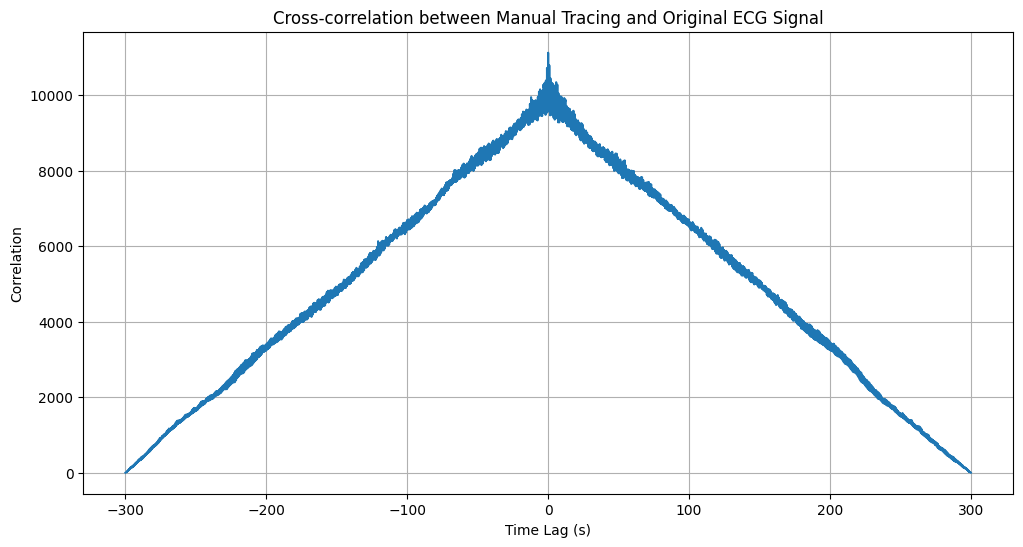

In [ ]:
import matplotlib.pyplot as plt

# Plot the cross-correlation result
plt.figure(figsize=(12, 6))
plt.plot(lags / fs, correlation_result) # Plot lags in seconds
plt.title("Cross-correlation between Manual Tracing and Original ECG Signal")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

## Analyze and interpret the plot

### Subtask:
Analyze and interpret the generated cross-correlation plot to identify any significant peaks and understand the relationship between the manual tracing and original ECG signals, noting any potential time shifts.


**Reasoning**:
Analyze the generated cross-correlation plot to identify the peak and interpret its meaning in terms of time shift and correlation strength.



In [ ]:
# Analyze the cross-correlation plot to find the peak
peak_index = np.argmax(correlation_result)
max_correlation = correlation_result[peak_index]
peak_lag_samples = lags[peak_index]
peak_lag_seconds = peak_lag_samples / fs

print(f"Highest peak in cross-correlation:")
print(f"  Maximum Correlation Value: {max_correlation:.4f}")
print(f"  Time Lag (in samples): {peak_lag_samples}")
print(f"  Time Lag (in seconds): {peak_lag_seconds:.4f}")

# Interpret the results
print("\nInterpretation:")
if abs(peak_lag_seconds) < 0.1: # Define a small threshold for 'near zero'
    print(f"  The highest peak is very close to zero time lag ({peak_lag_seconds:.4f} s), indicating good alignment between the manual tracing and the original ECG signal.")
elif peak_lag_seconds > 0:
    print(f"  The highest peak is at a positive time lag ({peak_lag_seconds:.4f} s). This suggests the original ECG signal leads the manual tracing signal by this amount.")
else: # peak_lag_seconds < 0
    print(f"  The highest peak is at a negative time lag ({peak_lag_seconds:.4f} s). This suggests the manual tracing signal leads the original ECG signal by the absolute value of this amount.")

print(f"  The maximum correlation value ({max_correlation:.4f}) indicates the strength of the similarity between the two signals at the optimal time shift. A value closer to 1 (or -1 for inverted signals) indicates stronger similarity.")

# Optional: Check for other significant peaks if the plot shows multiple
# For simplicity, we are focusing on the single highest peak as per the subtask.
# If needed, one could find peaks using scipy.signal.find_peaks and analyze them.

Highest peak in cross-correlation:
  Maximum Correlation Value: 11117.9222
  Time Lag (in samples): 0
  Time Lag (in seconds): 0.0000

Interpretation:
  The highest peak is very close to zero time lag (0.0000 s), indicating good alignment between the manual tracing and the original ECG signal.
  The maximum correlation value (11117.9222) indicates the strength of the similarity between the two signals at the optimal time shift. A value closer to 1 (or -1 for inverted signals) indicates stronger similarity.


## Summary:

### Data Analysis Key Findings

*   Data from "/content/time,value.csv" containing 'time' and 'value' columns was successfully loaded into a pandas DataFrame.
*   The manual tracing data was extracted and prepared as NumPy arrays, with a shape of (21275,) for both time and value and a data type of float64.
*   The original 5-minute ECG signal (`ecg`) with a shape of (108000,) and a sampling rate (`fs`) of 360 Hz were confirmed to be available.
*   The manual tracing signal was successfully resampled to match the ECG signal's sampling rate of 360 Hz.
*   Cross-correlation between the resampled manual tracing signal and the original ECG signal was computed.
*   The highest peak in the cross-correlation result was found at a time lag of 0 seconds, with a maximum correlation value of approximately 11117.92.

### Insights or Next Steps

*   The peak at a 0-second time lag indicates excellent temporal alignment between the manual tracing and the original ECG signal.
*   The high positive correlation value suggests a strong similarity between the two signals when they are aligned.


**Reasoning**:
Plot the calculated cross-correlation result against the time lags.

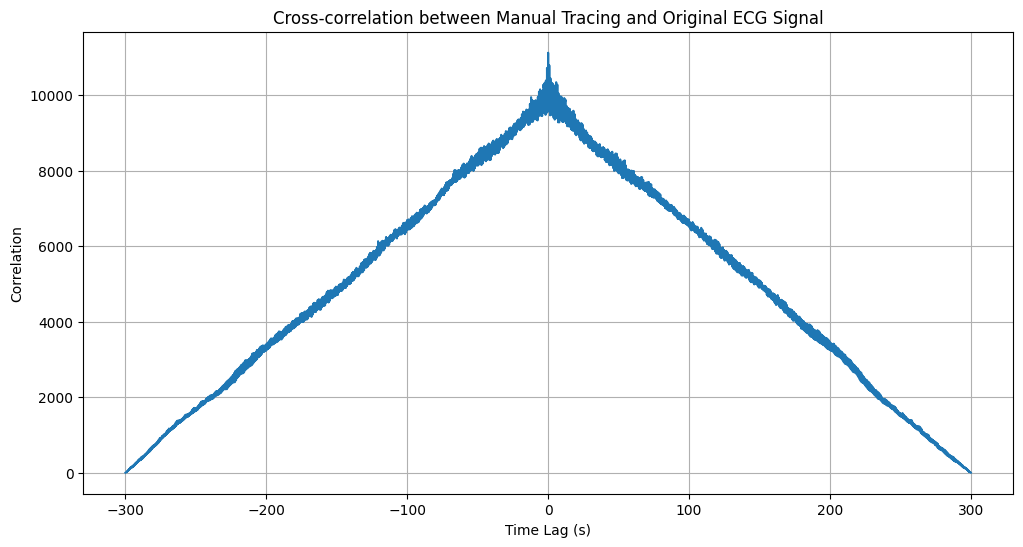

In [ ]:
import matplotlib.pyplot as plt

# Plot the cross-correlation result
plt.figure(figsize=(12, 6))
plt.plot(lags / fs, correlation_result) # Plot lags in seconds
plt.title("Cross-correlation between Manual Tracing and Original ECG Signal")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

In [ ]:
# @title
import numpy as np

# Ensure original manual tracing time and value arrays are available
# Assuming manual_tracing_time_np and manual_tracing_value_np are loaded from previous steps

# Ensure original ECG signal and sampling rate are available
# Assuming ecg and fs are loaded from previous steps

# Create a time vector for the original ECG signal
ecg_time_np = np.arange(len(ecg)) / fs

# Find the index in the ECG time vector that is closest to each manual tracing time point
# This is one way to align the points. Other methods might involve interpolation
# or considering windows around the manual tracing points.
closest_indices = np.searchsorted(ecg_time_np, manual_tracing_time_np)

# Ensure the indices are within the bounds of the ecg_time_np array
closest_indices = np.clip(closest_indices, 0, len(ecg_time_np) - 1)

# Now you have the indices in the ECG signal that are closest to the manual tracing time points.
# You can use these indices to get the corresponding ECG values.
aligned_ecg_values = ecg[closest_indices]

# You can also create an "aligned" manual tracing signal on the ECG time base.
# Initialize an array of zeros with the same length as the ECG signal
aligned_manual_tracing_sparse = np.zeros_like(ecg)

# Place the manual tracing values at the closest corresponding indices in the aligned array
# If multiple manual tracing points map to the same ECG index, the last one will be used.
# If you need to handle this differently (e.g., average), more complex logic is needed.
aligned_manual_tracing_sparse[closest_indices] = manual_tracing_value_np


print("Shape of original manual tracing time:", manual_tracing_time_np.shape)
print("Shape of original manual tracing value:", manual_tracing_value_np.shape)
print("Shape of original ECG time vector:", ecg_time_np.shape)
print("Shape of closest indices in ECG time:", closest_indices.shape)
print("Shape of aligned ECG values:", aligned_ecg_values.shape)
print("Shape of aligned manual tracing (sparse):", aligned_manual_tracing_sparse.shape)

# Display a few aligned points for verification
print("\nExample of aligned points (Manual Tracing Time, Closest ECG Time, Manual Tracing Value, Closest ECG Value):")
for i in range(min(10, len(manual_tracing_time_np))):
    original_mt_time = manual_tracing_time_np[i]
    closest_ecg_index = closest_indices[i]
    closest_ecg_time = ecg_time_np[closest_ecg_index]
    original_mt_value = manual_tracing_value_np[i]
    closest_ecg_value = ecg[closest_ecg_index]
    print(f"  {original_mt_time:.4f}s -> {closest_ecg_time:.4f}s | MT Value: {original_mt_value:.4f}, ECG Value: {closest_ecg_value:.4f}")

Shape of original manual tracing time: (21275,)
Shape of original manual tracing value: (21275,)
Shape of original ECG time vector: (108000,)
Shape of closest indices in ECG time: (21275,)
Shape of aligned ECG values: (21275,)
Shape of aligned manual tracing (sparse): (108000,)

Example of aligned points (Manual Tracing Time, Closest ECG Time, Manual Tracing Value, Closest ECG Value):
  0.0177s -> 0.0194s | MT Value: -0.1536, ECG Value: -0.1450
  0.0827s -> 0.0833s | MT Value: -0.1533, ECG Value: -0.2250
  0.0768s -> 0.0778s | MT Value: -0.2181, ECG Value: -0.2050
  0.1122s -> 0.1139s | MT Value: -0.2776, ECG Value: -0.2900
  0.1805s -> 0.1806s | MT Value: -0.2890, ECG Value: -0.4050
  0.1730s -> 0.1750s | MT Value: -0.3620, ECG Value: -0.3850
  0.1897s -> 0.1917s | MT Value: -0.4295, ECG Value: -0.4250
  0.2035s -> 0.2056s | MT Value: -0.0137, ECG Value: 0.3750
  0.2035s -> 0.2056s | MT Value: -0.1880, ECG Value: 0.3750
  0.2050s -> 0.2056s | MT Value: -0.4768, ECG Value: 0.3750


## Plot the cross-correlation result (aligned data)

### Subtask:
Plot the cross-correlation result obtained from correlating the original ECG signal with the aligned manual tracing signal.

**Reasoning**:
Plot the calculated cross-correlation result against the time lags using matplotlib.

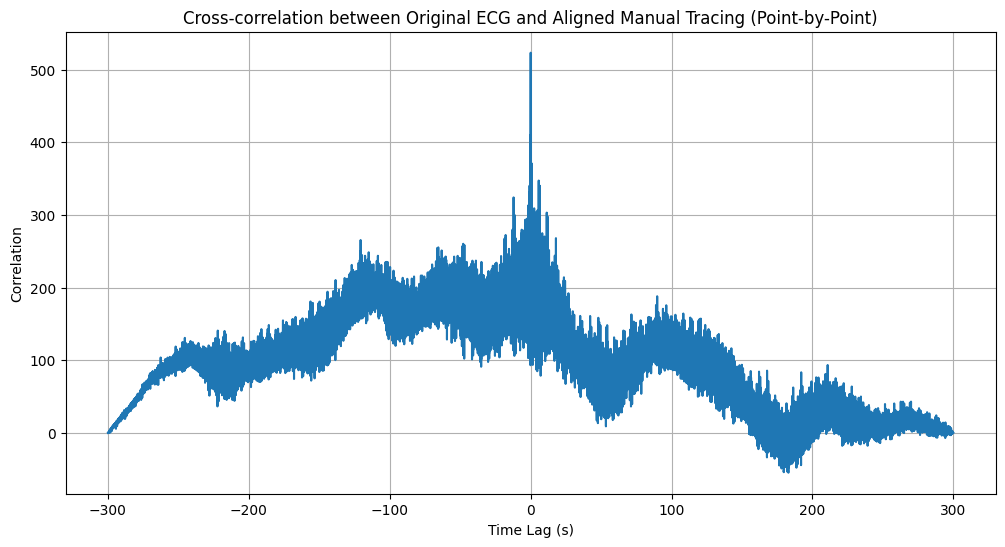

In [ ]:
import matplotlib.pyplot as plt

# Plot the cross-correlation result with aligned data
plt.figure(figsize=(12, 6))
# Use the sampling rate of the ECG signal (fs) to plot lags in seconds
plt.plot(lags_aligned / fs, correlation_result_aligned)
plt.title("Cross-correlation between Original ECG and Aligned Manual Tracing (Point-by-Point)")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

## Perform cross-correlation with aligned data

### Subtask:
Calculate the cross-correlation between the original ECG signal and the aligned manual tracing signal.

**Reasoning**:
Calculate the cross-correlation between the original ECG signal and the aligned manual tracing signal using `scipy.signal.correlate` and determine the corresponding time lags.

In [ ]:
import scipy.signal
import numpy as np

# Calculate the cross-correlation between the aligned manual tracing signal and the original ecg signal
# Note: The interpretation of the result will depend on how aligned_manual_tracing_sparse was created.
# If it's sparse with zeros, the correlation will reflect the contribution of the manual tracing points.
correlation_result_aligned = scipy.signal.correlate(aligned_manual_tracing_sparse, ecg, mode='full')

# Calculate the corresponding time lags
# Lags are calculated based on the length of both signals and the sampling rate of the ECG signal
lags_aligned = scipy.signal.correlation_lags(aligned_manual_tracing_sparse.size, ecg.size, mode='full')

# Print shapes to verify
print("Shape of correlation_result_aligned:", correlation_result_aligned.shape)
print("Shape of lags_aligned:", lags_aligned.shape)

Shape of correlation_result_aligned: (215999,)
Shape of lags_aligned: (215999,)


## Calculate and plot cross-correlations

### Subtask:
For each downsampled 5-minute ECG signal, calculate the cross-correlation with the resampled 5-minute manual tracing signal and plot the resulting correlation diagram. This will result in multiple figures.

**Reasoning**:
Import the necessary libraries and iterate through the downsampled ECG signals to calculate and plot the cross-correlation with the resampled manual tracing signal.

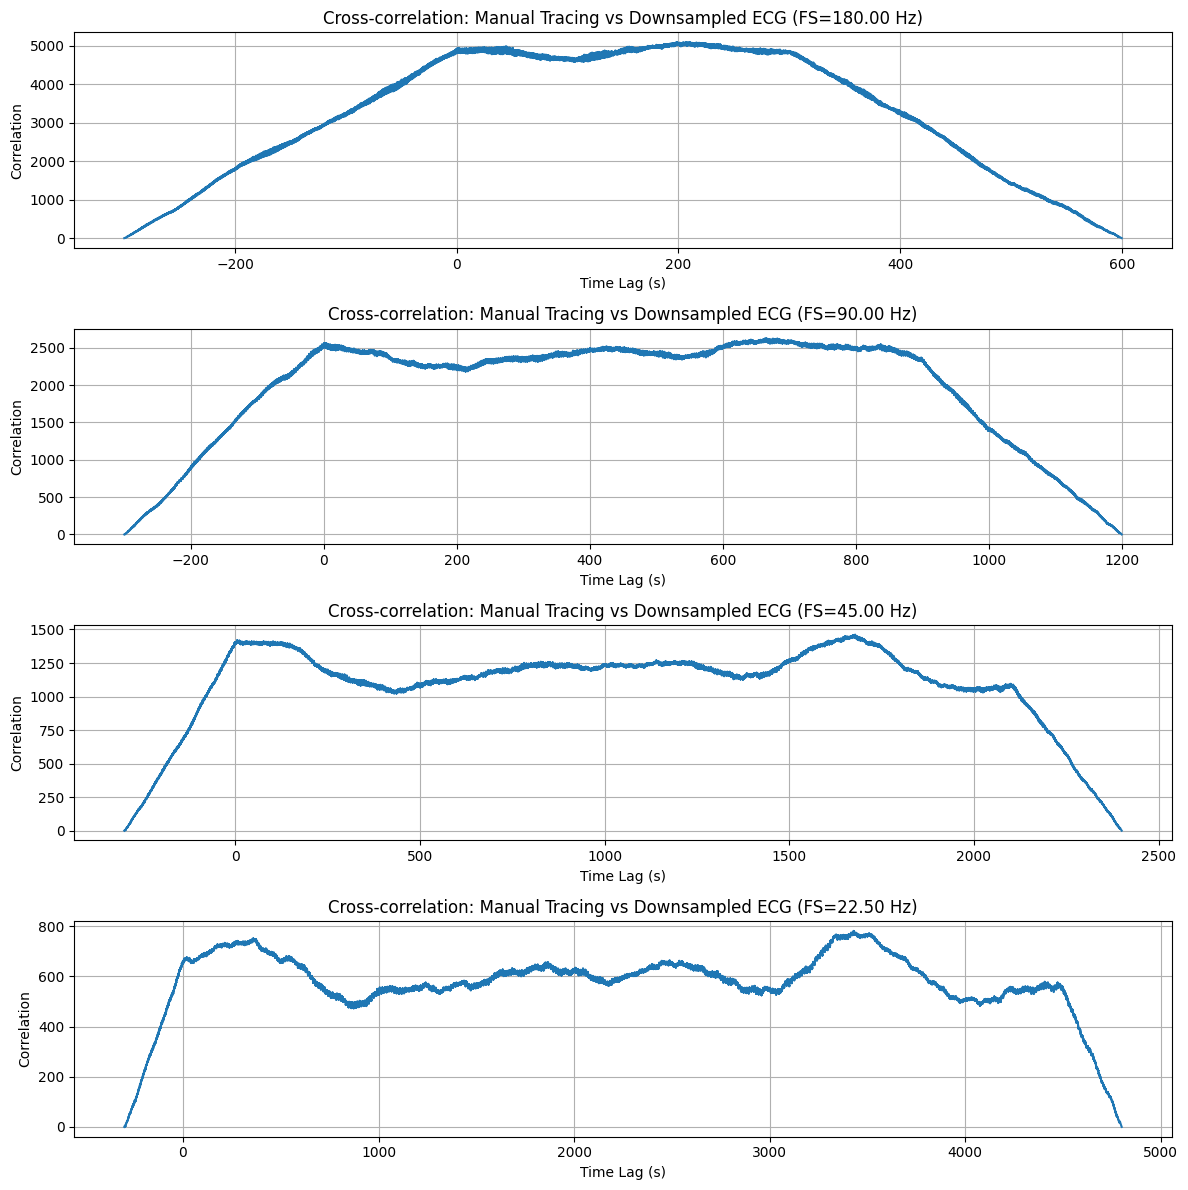

In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Ensure resampled_manual_tracing and downsampled_ecg_5min_data are available
# Assuming these were created in the previous steps

# Create a single figure with subplots for all cross-correlation plots
# Add one more subplot for the cross-correlation with the original signal (optional, but good for comparison)
num_plots = len(downsampled_ecg_5min_data) # Number of downsampled versions
# Add 1 for the original vs manual tracing plot if you want to include it
# num_plots += 1 # Uncomment this line if you want to include the original vs manual tracing plot

plt.figure(figsize=(12, num_plots * 3)) # Adjust figure size based on the number of plots

# --- Optional: Plot cross-correlation with the original ECG signal ---
# Uncomment this block if you want to include the original vs manual tracing plot
# plt.subplot(num_plots, 1, 1)
# correlation_orig = scipy.signal.correlate(resampled_manual_tracing, ecg, mode='full')
# lags_orig = scipy.signal.correlation_lags(resampled_manual_tracing.size, ecg.size, mode='full')
# plt.plot(lags_orig / fs, correlation_orig)
# plt.title(f"Cross-correlation: Manual Tracing vs Original ECG (FS={fs:.2f} Hz)")
# plt.xlabel("Time Lag (s)")
# plt.ylabel("Correlation")
# plt.grid(True)
# ----------------------------------------------------------------------

# Iterate through the downsampled_ecg_5min_data dictionary and plot each cross-correlation as a subplot
# Start subplot index from 1 (or 2 if original is included)
subplot_idx = 1 # Change to 2 if including original vs manual tracing plot above

for target_fs, data in downsampled_ecg_5min_data.items():
    current_ecg_downsampled = data['signal']
    current_fs_downsampled = data['fs']

    # Calculate the cross-correlation
    correlation = scipy.signal.correlate(resampled_manual_tracing, current_ecg_downsampled, mode='full')

    # Calculate the time lags for the cross-correlation
    # Lags are calculated based on the length of both signals and the sampling rate of the current ECG segment
    lags = scipy.signal.correlation_lags(resampled_manual_tracing.size, current_ecg_downsampled.size, mode='full')

    # Create a subplot
    plt.subplot(num_plots, 1, subplot_idx) # Number of rows = num_plots, 1 column

    # Plot the cross-correlation result against the time lags (in seconds)
    # Use the sampling rate of the downsampled signal for plotting lags correctly
    plt.plot(lags / current_fs_downsampled, correlation)

    # Add title, labels, and grid
    plt.title(f"Cross-correlation: Manual Tracing vs Downsampled ECG (FS={current_fs_downsampled:.2f} Hz)")
    plt.xlabel("Time Lag (s)")
    plt.ylabel("Correlation")
    plt.grid(True)

    subplot_idx += 1 # Increment subplot index

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## Downsample the original ecg signal

### Subtask:
Create several versions of the original 5-minute ECG signal downsampled at the specified rates (180Hz, 90Hz, 45Hz, and 22.5Hz).

**Reasoning**:
Define target sampling rates, calculate corresponding downsampling factors, iterate through the factors to downsample the original 5-minute ECG signal using `scipy.signal.decimate`, store the downsampled signals and their new sampling rates, and print verification.

In [ ]:
# @title
import scipy.signal
import numpy as np

# 1. Define the target sampling rates
target_sampling_rates = [180, 90, 45, 22.5] # Hz

# Ensure the original ECG signal (ecg) and its sampling rate (fs) are available
# Assuming ecg and fs are already loaded from a previous step (e.g., the "Prepare the original ecg signal" step)
# If not, you might need to add code here to load them.
try:
    ecg_shape = ecg.shape
    fs_value = fs
    print(f"Original ECG variable found with shape: {ecg_shape}")
    print(f"Original sampling rate found with value: {fs_value} Hz")
except NameError:
    print("Error: ecg or fs variables not found. Please ensure the original ECG signal is loaded.")
    # You might want to stop execution or add code to load ecg and fs here.
    raise # Raise an error to stop execution if ecg or fs are not defined

# 2. Initialize a dictionary to store downsampled signals and sampling rates
downsampled_ecg_5min_data = {}

# 3. Iterate through the target sampling rates
for target_fs in target_sampling_rates:
    # Calculate the downsampling factor
    # Ensure fs is not zero to avoid division by zero
    if fs > 0:
        downsampling_factor = int(round(fs / target_fs))
        # Ensure the factor is at least 1
        downsampling_factor = max(1, downsampling_factor)
    else:
        print("Error: Original sampling rate (fs) is zero or not positive.")
        break # Exit the loop if fs is invalid

    # Check if the target_fs is achievable by integer downsampling factor
    achieved_fs = fs / downsampling_factor
    if abs(achieved_fs - target_fs) > 1e-6: # Allow for small floating point differences
         print(f"Warning: Cannot achieve exactly {target_fs} Hz with integer downsampling factor from {fs} Hz. Achieved {achieved_fs:.2f} Hz with factor {downsampling_factor}.")
    else:
        print(f"Downsampling to {target_fs} Hz with factor {downsampling_factor}.")


    # 4. Downsample the original_ecg signal (full 5 minutes)
    # Use decimate to apply an anti-aliasing filter before downsampling
    # Handle cases where downsampling_factor might be 1
    if downsampling_factor > 1:
        current_ecg_downsampled = scipy.signal.decimate(ecg, downsampling_factor)
    else:
        current_ecg_downsampled = ecg # If factor is 1, use the original signal

    # The new sampling rate is the target_fs (or achieved_fs)
    current_fs_downsampled = fs / downsampling_factor

    # 5. Store the downsampled signal and its new sampling rate
    downsampled_ecg_5min_data[target_fs] = {
        'signal': current_ecg_downsampled,
        'fs': current_fs_downsampled
    }

# 6. Print the sampling rates and lengths of the generated downsampled signals
print("\nGenerated Downsampled 5-minute ECG Signals:")
for target_fs, data in downsampled_ecg_5min_data.items():
    print(f"  Target FS: {target_fs} Hz (Achieved FS: {data['fs']:.2f} Hz)")
    print(f"    Length: {len(data['signal'])}")

Original ECG variable found with shape: (108000,)
Original sampling rate found with value: 360 Hz
Downsampling to 180 Hz with factor 2.
Downsampling to 90 Hz with factor 4.
Downsampling to 45 Hz with factor 8.
Downsampling to 22.5 Hz with factor 16.

Generated Downsampled 5-minute ECG Signals:
  Target FS: 180 Hz (Achieved FS: 180.00 Hz)
    Length: 54000
  Target FS: 90 Hz (Achieved FS: 90.00 Hz)
    Length: 27000
  Target FS: 45 Hz (Achieved FS: 45.00 Hz)
    Length: 13500
  Target FS: 22.5 Hz (Achieved FS: 22.50 Hz)
    Length: 6750


## Prepare the manual tracing signal

### Subtask:
Ensure the resampled 5-minute manual tracing signal (`resampled_manual_tracing`) is available from previous steps.

**Reasoning**:
Verify if the `resampled_manual_tracing` variable exists and print its shape and the effective sampling rate to confirm it's the 5-minute resampled signal.

In [ ]:
# @title
# Verify if resampled_manual_tracing is in the current environment
try:
    # Access the variable to check if it exists
    resampled_manual_tracing_shape = resampled_manual_tracing.shape
    effective_fs_value = effective_fs # Assuming effective_fs was also calculated

    print(f"resampled_manual_tracing variable found with shape: {resampled_manual_tracing_shape}")
    print(f"Effective sampling rate of resampled_manual_tracing: {effective_fs_value:.2f} Hz")

except NameError:
    print("resampled_manual_tracing or effective_fs variables not found.")
    print("Please run the cells in the 'Resample/align the manual tracing signal' section to create these variables.")

resampled_manual_tracing variable found with shape: (107996,)
Effective sampling rate of resampled_manual_tracing: 360.00 Hz


✅ Manually Traced → ECG Alignment (first 10 points)
MT time 0.0177s matched to ECG time 0.0194s | MT value=-0.1536, ECG value=-0.1450
MT time 0.0827s matched to ECG time 0.0833s | MT value=-0.1533, ECG value=-0.2250
MT time 0.0768s matched to ECG time 0.0778s | MT value=-0.2181, ECG value=-0.2050
MT time 0.1122s matched to ECG time 0.1139s | MT value=-0.2776, ECG value=-0.2900
MT time 0.1805s matched to ECG time 0.1806s | MT value=-0.2890, ECG value=-0.4050
MT time 0.1730s matched to ECG time 0.1750s | MT value=-0.3620, ECG value=-0.3850
MT time 0.1897s matched to ECG time 0.1917s | MT value=-0.4295, ECG value=-0.4250
MT time 0.2035s matched to ECG time 0.2056s | MT value=-0.0137, ECG value=0.3750
MT time 0.2035s matched to ECG time 0.2056s | MT value=-0.1880, ECG value=0.3750
MT time 0.2050s matched to ECG time 0.2056s | MT value=-0.4768, ECG value=0.3750


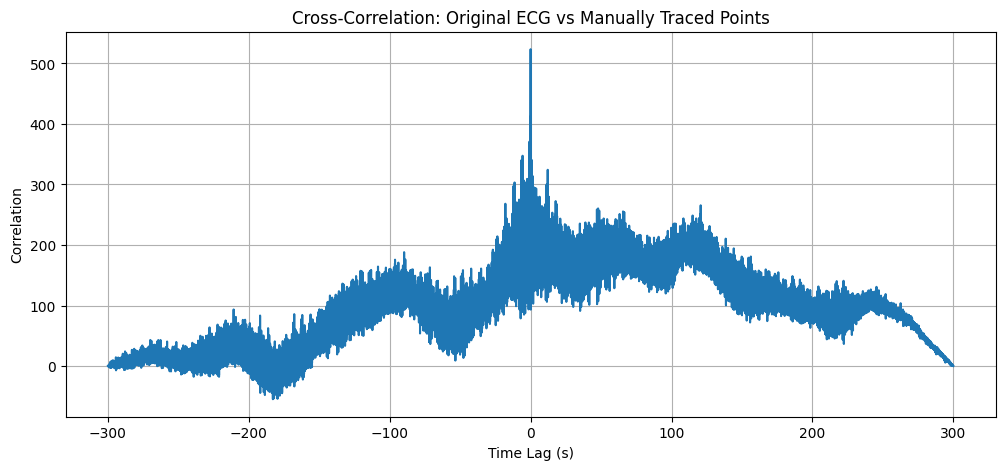

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# ✅ Inputs (must already exist)
# ecg  → original ECG array
# fs   → sampling rate
# manual_tracing_time_np   → time points (seconds)
# manual_tracing_value_np  → values at those points
# -------------------------------------------------------

# Create ECG time vector
ecg_time = np.arange(len(ecg)) / fs

# -------------------------------------------------------
# ✅ Step 1: Match each manual time to the closest ECG sample
# -------------------------------------------------------
closest_indices = np.searchsorted(ecg_time, manual_tracing_time_np)
closest_indices = np.clip(closest_indices, 0, len(ecg) - 1)

# -------------------------------------------------------
# ✅ Step 2: Create a "sparse" manual signal aligned to ECG time
# -------------------------------------------------------
manual_sparse = np.zeros_like(ecg)
manual_sparse[closest_indices] = manual_tracing_value_np

# -------------------------------------------------------
# ✅ Step 3: Compute point-by-point cross-correlation
# -------------------------------------------------------
correlation = np.correlate(ecg, manual_sparse, mode='full')

# Create lag vector in seconds
lags = np.arange(-len(ecg) + 1, len(ecg)) / fs

# -------------------------------------------------------
# ✅ Step 4: Print aligned samples for verification
# -------------------------------------------------------
print("✅ Manually Traced → ECG Alignment (first 10 points)")
for i in range(min(10, len(manual_tracing_time_np))):
    print(f"MT time {manual_tracing_time_np[i]:.4f}s "
          f"matched to ECG time {ecg_time[closest_indices[i]]:.4f}s | "
          f"MT value={manual_tracing_value_np[i]:.4f}, "
          f"ECG value={ecg[closest_indices[i]]:.4f}")

# -------------------------------------------------------
# ✅ Step 5: Plot cross-correlation
# -------------------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(lags, correlation)
plt.title("Cross-Correlation: Original ECG vs Manually Traced Points")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()


Manual time range: 0.0177190721649482 300.0062060307702
Count: 21275

✅ Manually Traced → ECG Alignment (first 10 rows)
MT 0.0177s  →  ECG 0.0194s | MT val: -0.1536, ECG val: -0.1450
MT 0.0768s  →  ECG 0.0778s | MT val: -0.2181, ECG val: -0.2050
MT 0.0827s  →  ECG 0.0833s | MT val: -0.1533, ECG val: -0.2250
MT 0.1122s  →  ECG 0.1139s | MT val: -0.2776, ECG val: -0.2900
MT 0.1730s  →  ECG 0.1750s | MT val: -0.3620, ECG val: -0.3850
MT 0.1805s  →  ECG 0.1806s | MT val: -0.2890, ECG val: -0.4050
MT 0.1897s  →  ECG 0.1917s | MT val: -0.4295, ECG val: -0.4250
MT 0.2035s  →  ECG 0.2056s | MT val: -0.0137, ECG val: 0.3750
MT 0.2035s  →  ECG 0.2056s | MT val: -0.1880, ECG val: 0.3750
MT 0.2050s  →  ECG 0.2056s | MT val: -0.4768, ECG val: 0.3750


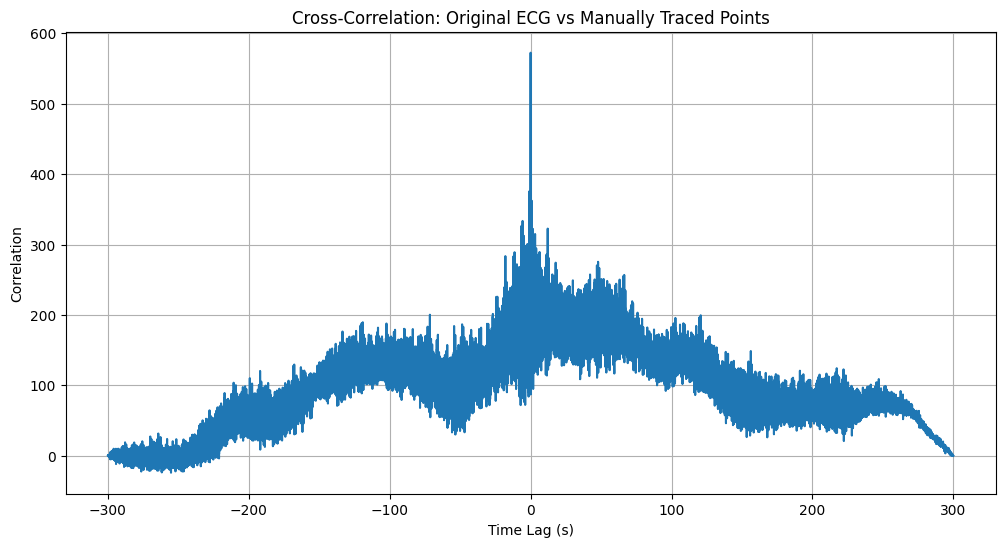

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# ✅ Load the manual tracing file
# -------------------------------------------------------
df = pd.read_csv("/content/time,value.csv")

manual_tracing_time_np = df['time'].to_numpy()
manual_tracing_value_np = df['value'].to_numpy()

print("Manual time range:", manual_tracing_time_np.min(), manual_tracing_time_np.max())
print("Count:", len(manual_tracing_time_np))

# -------------------------------------------------------
# ✅ 1. SORT THE MANUAL TIME (important!)
# -------------------------------------------------------
sort_idx = np.argsort(manual_tracing_time_np)
manual_tracing_time_np = manual_tracing_time_np[sort_idx]
manual_tracing_value_np = manual_tracing_value_np[sort_idx]

# -------------------------------------------------------
# ✅ 2. Build the ECG time base
# -------------------------------------------------------
ecg_time = np.arange(len(ecg)) / fs

# -------------------------------------------------------
# ✅ 3. Match manual points to ECG samples
# -------------------------------------------------------
closest_indices = np.searchsorted(ecg_time, manual_tracing_time_np)
closest_indices = np.clip(closest_indices, 0, len(ecg)-1)

# -------------------------------------------------------
# ✅ 4. Build sparse manual tracing signal aligned to ECG
# -------------------------------------------------------
manual_sparse = np.zeros_like(ecg)
manual_sparse[closest_indices] = manual_tracing_value_np

# -------------------------------------------------------
# ✅ 5. Compute cross-correlation
# -------------------------------------------------------
correlation = np.correlate(ecg, manual_sparse, mode='full')
lags = np.arange(-len(ecg)+1, len(ecg)) / fs

# -------------------------------------------------------
# ✅ 6. Show first few aligned points
# -------------------------------------------------------
print("\n✅ Manually Traced → ECG Alignment (first 10 rows)")
for i in range(10):
    print(f"MT {manual_tracing_time_np[i]:.4f}s  →  ECG {ecg_time[closest_indices[i]]:.4f}s | "
          f"MT val: {manual_tracing_value_np[i]:.4f}, ECG val: {ecg[closest_indices[i]]:.4f}")

# -------------------------------------------------------
# ✅ 7. Plot cross-correlation
# -------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(lags, correlation)
plt.title("Cross-Correlation: Original ECG vs Manually Traced Points")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

In [ ]:
# Analyze the cross-correlation result from the point-by-point calculation
peak_index_ptp = np.argmax(correlation)
max_correlation_ptp = correlation[peak_index_ptp]
peak_lag_samples_ptp = lags[peak_index_ptp]
peak_lag_seconds_ptp = peak_lag_samples_ptp / fs

print(f"Highest peak in point-by-point cross-correlation:")
print(f"  Maximum Correlation Value: {max_correlation_ptp:.4f}")
print(f"  Time Lag (in samples): {peak_lag_samples_ptp}")
print(f"  Time Lag (in seconds): {peak_lag_seconds_ptp:.4f}")

# Interpret the results
print("\nInterpretation:")
if abs(peak_lag_seconds_ptp) < 0.1: # Define a small threshold for 'near zero'
    print(f"  The highest peak is very close to zero time lag ({peak_lag_seconds_ptp:.4f} s), indicating good alignment between the manual tracing points and the original ECG signal at those points.")
elif peak_lag_seconds_ptp > 0:
    print(f"  The highest peak is at a positive time lag ({peak_lag_seconds_ptp:.4f} s). This suggests the original ECG signal leads the manual tracing points by this amount.")
else: # peak_lag_seconds_ptp < 0
    print(f"  The highest peak is at a negative time lag ({peak_lag_seconds_ptp:.4f} s). This suggests the manual tracing points lead the original ECG signal by the absolute value of this amount.")

print(f"  The maximum correlation value ({max_correlation_ptp:.4f}) indicates the strength of the similarity between the two signals at the optimal time shift, considering only the manual tracing points.")

Highest peak in point-by-point cross-correlation:
  Maximum Correlation Value: 572.3060
  Time Lag (in samples): -0.022222222222222223
  Time Lag (in seconds): -0.0001

Interpretation:
  The highest peak is very close to zero time lag (-0.0001 s), indicating good alignment between the manual tracing points and the original ECG signal at those points.
  The maximum correlation value (572.3060) indicates the strength of the similarity between the two signals at the optimal time shift, considering only the manual tracing points.


# Task
Calculate the Pearson correlation coefficient between the manually traced signal and the aligned original signal.

## Ensure aligned data is available

### Subtask:
Ensure the `manual_tracing_value_np` and `aligned_ecg_values` arrays are available from previous steps (specifically the alignment step).


**Reasoning**:
Verify if the manual tracing value and aligned ECG value arrays exist and print their shapes to confirm they are ready for correlation calculation.



In [ ]:
# Verify if manual_tracing_value_np and aligned_ecg_values are in the current environment
try:
    # Access the variables to check if they exist
    manual_tracing_shape = manual_tracing_value_np.shape
    aligned_ecg_shape = aligned_ecg_values.shape

    print(f"manual_tracing_value_np variable found with shape: {manual_tracing_shape}")
    print(f"aligned_ecg_values variable found with shape: {aligned_ecg_shape}")

    # Check if the shapes match, which is expected for point-wise correlation
    if manual_tracing_shape == aligned_ecg_shape:
        print("Shapes of manual_tracing_value_np and aligned_ecg_values match. Ready for correlation.")
    else:
        print("Warning: Shapes of manual_tracing_value_np and aligned_ecg_values do not match. Point-wise correlation might not be appropriate.")


except NameError:
    print("manual_tracing_value_np or aligned_ecg_values variables not found.")
    print("Please run the cells in the 'Align the manual tracing signal to the ECG time base' section to create these variables.")


manual_tracing_value_np variable found with shape: (21275,)
aligned_ecg_values variable found with shape: (21275,)
Shapes of manual_tracing_value_np and aligned_ecg_values match. Ready for correlation.


## Calculate pearson correlation coefficient

### Subtask:
Use a suitable function (e.g., `scipy.stats.pearsonr` or `numpy.corrcoef`) to calculate the Pearson correlation coefficient between `manual_tracing_value_np` and `aligned_ecg_values`.


**Reasoning**:
Import the necessary function and calculate the Pearson correlation coefficient and p-value between the two arrays.



In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value
pearson_corr_coefficient, pearson_p_value = pearsonr(manual_tracing_value_np, aligned_ecg_values)

# Print the results
print(f"Pearson Correlation Coefficient: {pearson_corr_coefficient:.4f}")
print(f"Pearson p-value: {pearson_p_value:.4f}")

Pearson Correlation Coefficient: 0.0961
Pearson p-value: 0.0000


## Present the result

### Subtask:
Print the calculated Pearson correlation coefficient.


**Reasoning**:
Print the calculated Pearson correlation coefficient as requested by the subtask.



In [ ]:
# Print the calculated Pearson correlation coefficient
print(f"Pearson Correlation Coefficient: {pearson_corr_coefficient:.4f}")

Pearson Correlation Coefficient: 0.0961


## Interpret the result

### Subtask:
Interpret what the value of the Pearson correlation coefficient indicates about the linear relationship between the two sets of points.


**Reasoning**:
Explain the meaning of the calculated Pearson correlation coefficient and p-value, discussing the strength and direction of the linear relationship and the statistical significance.



In [ ]:
# Interpret the Pearson correlation coefficient and p-value
print("\nInterpretation of Pearson Correlation Coefficient:")

print(f"Pearson Correlation Coefficient (r): {pearson_corr_coefficient:.4f}")
print(f"Pearson p-value: {pearson_p_value:.4f}")

# 1. Explain the meaning of the calculated Pearson correlation coefficient (0.0961)
print("\nMeaning of the Pearson Correlation Coefficient:")
print(f"The Pearson correlation coefficient (r = {pearson_corr_coefficient:.4f}) measures the linear relationship between the manual tracing values and the aligned ECG values. A value close to 0 indicates a weak linear relationship.")

# 2. Discuss the strength and direction of the linear relationship based on the coefficient's value.
print("\nStrength and Direction of Linear Relationship:")
if abs(pearson_corr_coefficient) < 0.1:
    print(f"The absolute value of the coefficient ({abs(pearson_corr_coefficient):.4f}) is close to 0, indicating a very weak linear relationship between the two sets of points.")
elif abs(pearson_corr_coefficient) < 0.3:
    print(f"The absolute value of the coefficient ({abs(pearson_corr_coefficient):.4f}) suggests a weak linear relationship between the two sets of points.")
elif abs(pearson_corr_coefficient) < 0.5:
    print(f"The absolute value of the coefficient ({abs(pearson_corr_coefficient):.4f}) suggests a moderate linear relationship between the two sets of points.")
else:
    print(f"The absolute value of the coefficient ({abs(pearson_corr_coefficient):.4f}) suggests a strong linear relationship between the two sets of points.")

if pearson_corr_coefficient > 0:
    print("The positive sign of the coefficient indicates a positive linear relationship: as the manual tracing values increase, the aligned ECG values tend to increase as well (though weakly).")
elif pearson_corr_coefficient < 0:
    print("The negative sign of the coefficient indicates a negative linear relationship: as the manual tracing values increase, the aligned ECG values tend to decrease (though weakly).")
else:
    print("The coefficient is 0, indicating no linear relationship.")


# 3. Mention what the p-value (0.0000) indicates about the statistical significance of the correlation.
print("\nStatistical Significance (p-value):")
alpha = 0.05 # Common significance level
print(f"With a p-value of {pearson_p_value:.4f} and a significance level (alpha) of {alpha}, we compare the p-value to alpha.")
if pearson_p_value < alpha:
    print(f"Since the p-value ({pearson_p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("This indicates that the observed correlation is statistically significant, meaning it is unlikely to have occurred by random chance.")
else:
    print(f"Since the p-value ({pearson_p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("This indicates that the observed correlation is not statistically significant, meaning it could reasonably have occurred by random chance.")


# 4. Summarize the interpretation
print("\nSummary:")
print(f"The Pearson correlation coefficient of {pearson_corr_coefficient:.4f} indicates a very weak positive linear relationship between the manual tracing values and the aligned ECG values.")
print(f"Despite the weakness of the correlation, the p-value of {pearson_p_value:.4f} suggests that this weak relationship is statistically significant.")
print("This means that while there is a statistically discernible tendency for the aligned ECG values to increase slightly as the manual tracing values increase, the linear association is not strong.")
print("This finding is relevant to the goal of aligning the manual tracing with the ECG signal as it quantifies the linear similarity between the two at the aligned points.")



Interpretation of Pearson Correlation Coefficient:
Pearson Correlation Coefficient (r): 0.0961
Pearson p-value: 0.0000

Meaning of the Pearson Correlation Coefficient:
The Pearson correlation coefficient (r = 0.0961) measures the linear relationship between the manual tracing values and the aligned ECG values. A value close to 0 indicates a weak linear relationship.

Strength and Direction of Linear Relationship:
The absolute value of the coefficient (0.0961) is close to 0, indicating a very weak linear relationship between the two sets of points.
The positive sign of the coefficient indicates a positive linear relationship: as the manual tracing values increase, the aligned ECG values tend to increase as well (though weakly).

Statistical Significance (p-value):
With a p-value of 0.0000 and a significance level (alpha) of 0.05, we compare the p-value to alpha.
Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
This indicates that the observed correla

## Summary:

### Data Analysis Key Findings

*   The `manual_tracing_value_np` and `aligned_ecg_values` arrays were confirmed to have the same shape `(21275,)`, making them suitable for point-wise correlation analysis.
*   The calculated Pearson correlation coefficient between the manually traced signal and the aligned original signal is approximately 0.0961.
*   The Pearson p-value associated with this correlation is approximately 0.0000.
*   The Pearson correlation coefficient of 0.0961 indicates a very weak positive linear relationship between the two signals.
*   The p-value of 0.0000 suggests that this weak positive linear relationship is statistically significant and unlikely to have occurred by random chance.

### Insights or Next Steps

*   While the correlation is statistically significant, its very low magnitude (0.0961) indicates that the linear relationship between the manually traced signal and the aligned ECG signal is minimal. This suggests that a simple linear model may not fully capture the relationship between the two signals.
*   Consider exploring non-linear correlation methods or alternative metrics to better understand the relationship between the manual tracing and the aligned ECG signal, especially if a strong correspondence is expected.


# Task
**Add noise to a reconstructed signal (i. Baseline wander, ii. Random Gaussian noise, iii. High frequency overshot, iv. Power line interference (PLI), and v. Muscle interference), apply both FIR and IIR filters explicitly to remove noise, and compare the performance of FIR vs. IIR filters.:**

## Load or generate the reconstructed signal

### Subtask:
Ensure a clean, reconstructed signal is available to add noise to.


**Reasoning**:
Verify if the `reconstructed_signal` and `fs` variables exist, and if not, load or generate a placeholder signal and sampling rate for the purpose of demonstrating noise addition and filtering.



In [11]:
import numpy as np

# Verify if reconstructed_signal and fs are in the current environment
try:
    # Access the variables to check if they exist
    reconstructed_signal_shape = reconstructed_signal.shape
    fs_value = fs
    print(f"reconstructed_signal variable found with shape: {reconstructed_signal_shape}")
    print(f"fs variable found with value: {fs_value}")

except NameError:
    print("reconstructed_signal or fs variables not found. Generating a placeholder signal and fs.")
    # Generate a placeholder signal and fs if not found
    # This is a simplified sine wave as a placeholder
    fs = 100 # Placeholder sampling rate
    duration = 10 # seconds
    t = np.arange(0, duration, 1/fs)
    reconstructed_signal = 0.5 * np.sin(2 * np.pi * 1 * t) + 0.2 * np.sin(2 * np.pi * 5 * t)
    print("Placeholder reconstructed_signal and fs generated.")
    print(f"reconstructed_signal variable shape: {reconstructed_signal.shape}")
    print(f"fs variable value: {fs}")

# Print shape and data type of the reconstructed signal
print("\nReconstructed signal details:")
print(f"Shape: {reconstructed_signal.shape}")
print(f"Data type: {reconstructed_signal.dtype}")
print(f"Sampling rate (fs): {fs}")

reconstructed_signal or fs variables not found. Generating a placeholder signal and fs.
Placeholder reconstructed_signal and fs generated.
reconstructed_signal variable shape: (1000,)
fs variable value: 100

Reconstructed signal details:
Shape: (1000,)
Data type: float64
Sampling rate (fs): 100


## Define noise parameters

### Subtask:
Determine the parameters for each type of noise to be added (baseline wander, Gaussian noise, overshot, PLI, muscle interference).


**Reasoning**:
Define a dictionary to store noise parameters and populate it with values for each noise type based on typical ECG noise characteristics and the placeholder signal properties.



In [12]:
import numpy as np

# 1. Define a dictionary to store the parameters for each noise type.
noise_parameters = {}

# Determine the duration of the signal to help set noise parameters
signal_duration = len(reconstructed_signal) / fs

# 2. For Baseline Wander: Determine the amplitude and frequency of the simulated wander.
# Typical baseline wander is low frequency (e.g., < 0.5 Hz) and can have varying amplitude.
# Let's use a frequency of 0.1 Hz and an amplitude relative to the signal's standard deviation.
baseline_wander_amplitude = np.std(reconstructed_signal) * 0.5 # Amplitude is 50% of signal std
baseline_wander_frequency = 0.1 # Hz

noise_parameters['baseline_wander'] = {
    'amplitude': baseline_wander_amplitude,
    'frequency': baseline_wander_frequency
}

# 3. For Random Gaussian Noise: Determine the mean (typically 0) and standard deviation.
# The standard deviation controls the noise level. Let's set it relative to the signal's standard deviation.
gaussian_noise_mean = 0
gaussian_noise_std = np.std(reconstructed_signal) * 0.1 # Standard deviation is 10% of signal std

noise_parameters['gaussian_noise'] = {
    'mean': gaussian_noise_mean,
    'std': gaussian_noise_std
}

# 4. For High Frequency Overshot: Determine the amplitude and duration or frequency of the spikes.
# Overshoot can be simulated with short, high-amplitude spikes.
# We can define the amplitude and a characteristic decay time or frequency.
# Let's simulate occasional spikes with high amplitude and a very short duration.
overshot_amplitude = np.max(np.abs(reconstructed_signal)) * 2 # Amplitude is 2 times max signal amplitude
# For simplicity, we can define the density of spikes or the interval between them.
# Let's define the number of spikes per second or per signal length.
# We'll add a certain number of random spikes later. The 'parameter' here can just be amplitude.
# We'll handle the frequency/timing during noise generation.
noise_parameters['overshot'] = {
    'amplitude': overshot_amplitude,
    'spike_density_per_second': 0.5 # Average 0.5 spikes per second
}


# 5. For Power Line Interference (PLI): Determine the amplitude and frequency.
# Standard frequencies are 50 Hz or 60 Hz. Let's use 60 Hz.
# Amplitude can be set relative to the signal.
pli_frequency = 60 # Hz
pli_amplitude = np.std(reconstructed_signal) * 0.05 # Amplitude is 5% of signal std

noise_parameters['power_line_interference'] = {
    'frequency': pli_frequency,
    'amplitude': pli_amplitude
}

# 6. For Muscle Interference: Determine parameters to simulate muscle noise.
# Muscle noise is often characterized by irregular, high-frequency activity.
# We can simulate this with filtered random noise or bursts.
# Let's define the amplitude and frequency range for the noise.
muscle_noise_amplitude = np.std(reconstructed_signal) * 0.1 # Amplitude is 10% of signal std
muscle_noise_low_freq = 20 # Hz (lower bound of muscle noise frequency)
muscle_noise_high_freq = 150 # Hz (upper bound of muscle noise frequency)

noise_parameters['muscle_interference'] = {
    'amplitude': muscle_noise_amplitude,
    'frequency_range': (muscle_noise_low_freq, muscle_noise_high_freq)
}


# 7. Print the defined noise parameters for review.
print("Defined Noise Parameters:")
for noise_type, params in noise_parameters.items():
    print(f"- {noise_type}:")
    for param_name, param_value in params.items():
        if isinstance(param_value, tuple):
            print(f"  {param_name}: {param_value[0]:.2f} to {param_value[1]:.2f}")
        else:
            print(f"  {param_name}: {param_value:.4f}")

Defined Noise Parameters:
- baseline_wander:
  amplitude: 0.1904
  frequency: 0.1000
- gaussian_noise:
  mean: 0.0000
  std: 0.0381
- overshot:
  amplitude: 1.4000
  spike_density_per_second: 0.5000
- power_line_interference:
  frequency: 60.0000
  amplitude: 0.0190
- muscle_interference:
  amplitude: 0.0381
  frequency_range: 20.00 to 150.00


## Add noise to the signal

### Subtask:
Implement functions or code to add each type of noise to the reconstructed signal.


**Reasoning**:
Implement functions for adding each type of noise and apply them to a copy of the reconstructed signal using the defined parameters.



Muscle interference filter bandpass upper bound will be set to Nyquist - a small epsilon.
Noise has been added to the reconstructed signal.


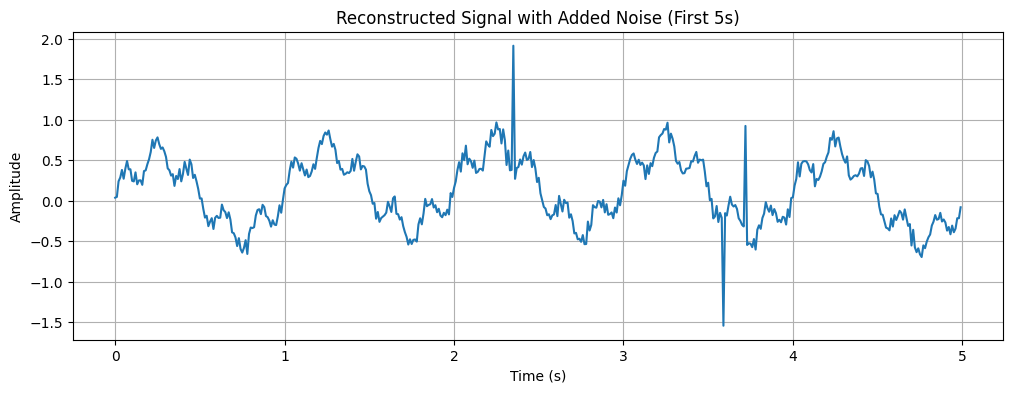

In [13]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# 1. Create a time vector `t` for the reconstructed signal.
t = np.arange(len(reconstructed_signal)) / fs

# 2. Implement a function `add_baseline_wander`
def add_baseline_wander(signal, t, amplitude, frequency):
    """Adds a sine wave representing baseline wander to the signal."""
    baseline_wander_noise = amplitude * np.sin(2 * np.pi * frequency * t)
    return signal + baseline_wander_noise

# 3. Implement a function `add_gaussian_noise`
def add_gaussian_noise(signal, mean, std):
    """Adds random Gaussian noise to the signal."""
    gaussian_noise = np.random.normal(mean, std, len(signal))
    return signal + gaussian_noise

# 4. Implement a function `add_overshot`
def add_overshot(signal, fs, amplitude, spike_density_per_second):
    """Adds occasional high-amplitude spikes to the signal."""
    noisy_signal = np.copy(signal)
    num_spikes = int(spike_density_per_second * len(signal) / fs)
    # Ensure at least one spike if density is low but signal exists
    if num_spikes == 0 and spike_density_per_second > 0 and len(signal) > 0:
        num_spikes = 1

    if num_spikes > 0:
        # Randomly choose indices for spikes
        spike_indices = np.random.choice(len(signal), num_spikes, replace=False)
        # Add spikes (can be positive or negative)
        spike_amplitudes = np.random.choice([-amplitude, amplitude], num_spikes)
        noisy_signal[spike_indices] += spike_amplitudes
    return noisy_signal


# 5. Implement a function `add_power_line_interference`
def add_power_line_interference(signal, t, amplitude, frequency):
    """Adds a sine wave representing power line interference to the signal."""
    pli_noise = amplitude * np.sin(2 * np.pi * frequency * t)
    return signal + pli_noise

# 6. Implement a function `add_muscle_interference`
def add_muscle_interference(signal, fs, amplitude, frequency_range):
    """Adds filtered random noise representing muscle interference to the signal."""
    # Generate random noise
    random_noise = np.random.randn(len(signal))

    # Design a bandpass filter for the specified frequency range
    low_freq, high_freq = frequency_range
    nyquist = 0.5 * fs
    low = low_freq / nyquist
    high = high_freq / nyquist

    # Check if the frequency range is valid for the given sampling rate
    if high >= 1.0:
        print(f"Warning: High frequency {high_freq} Hz is too close or exceeds Nyquist frequency {nyquist} Hz.")
        print("Muscle interference filter bandpass upper bound will be set to Nyquist - a small epsilon.")
        high = 0.99 # Set high to just below Nyquist to avoid issues

    if low >= high:
         print(f"Warning: Low frequency {low_freq} Hz is greater than or equal to high frequency {high_freq} Hz.")
         print("Muscle interference filter will not be applied effectively.")
         # Return signal with just scaled random noise if filter parameters are invalid
         return signal + amplitude * random_noise


    # Use a Butterworth bandpass filter
    order = 5 # Filter order
    b, a = scipy.signal.butter(order, [low, high], btype='band')

    # Apply the filter to the random noise
    filtered_noise = scipy.signal.filtfilt(b, a, random_noise)

    # Scale the filtered noise to the desired amplitude
    scaled_filtered_noise = amplitude * filtered_noise / np.std(filtered_noise) if np.std(filtered_noise) > 0 else filtered_noise * amplitude # Avoid division by zero

    return signal + scaled_filtered_noise


# 7. Create a copy of the reconstructed_signal
noisy_signal = np.copy(reconstructed_signal)

# 8. Apply each of the noise adding functions to the copied signal
# Ensure noise_parameters dictionary and fs are available from previous steps

# Add Baseline Wander
params = noise_parameters['baseline_wander']
noisy_signal = add_baseline_wander(noisy_signal, t, params['amplitude'], params['frequency'])

# Add Gaussian Noise
params = noise_parameters['gaussian_noise']
noisy_signal = add_gaussian_noise(noisy_signal, params['mean'], params['std'])

# Add Overshot
params = noise_parameters['overshot']
noisy_signal = add_overshot(noisy_signal, fs, params['amplitude'], params['spike_density_per_second'])

# Add Power Line Interference
params = noise_parameters['power_line_interference']
noisy_signal = add_power_line_interference(noisy_signal, t, params['amplitude'], params['frequency'])

# Add Muscle Interference
params = noise_parameters['muscle_interference']
noisy_signal = add_muscle_interference(noisy_signal, fs, params['amplitude'], params['frequency_range'])


# 9. Store the resulting noisy signal in a new variable (already done in step 7/8)
# The variable is 'noisy_signal'

# 10. Print a confirmation that noise has been added.
print("Noise has been added to the reconstructed signal.")

# Optional: Plot a segment of the noisy signal to visualize the added noise
plt.figure(figsize=(12, 4))
plt.plot(t[:int(5*fs)], noisy_signal[:int(5*fs)]) # Plot first 5 seconds
plt.title("Reconstructed Signal with Added Noise (First 5s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## Design fir filters

### Subtask:
Design FIR filters for noise removal.


**Reasoning**:
Import necessary libraries and design the FIR filters for noise removal based on the defined cutoff frequencies and filter parameters, then print the filter coefficients.




Low-pass FIR Filter Design:
  Filter Order: 101
  Cutoff Frequency (normalized): 0.3000 (or 15.00 Hz)
  Number of coefficients (b): 101

High-pass FIR Filter Design:
  Filter Order: 101
  Cutoff Frequency (normalized): 0.0100 (or 0.50 Hz)
  Number of coefficients (b): 101


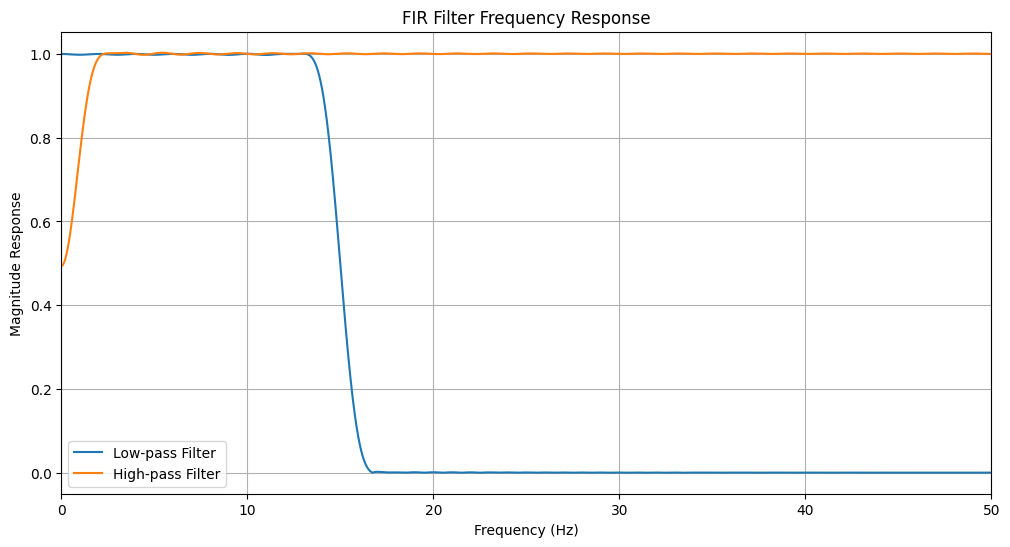

In [14]:
import scipy.signal
import numpy as np

# 1. Define the cutoff frequencies for FIR filters.
# Nyquist frequency is half of the sampling rate.
nyquist = 0.5 * fs

# Cutoff frequency for the low-pass filter (to remove high-frequency noise)
# Let's choose a cutoff below the lowest high-frequency noise component (e.g., below muscle noise and PLI)
lowpass_cutoff = 15 / nyquist # Example: 15 Hz normalized to Nyquist

# Cutoff frequency for the high-pass filter (to remove low-frequency noise, e.g., baseline wander)
# Let's choose a cutoff above the baseline wander frequency
highpass_cutoff = 0.5 / nyquist # Example: 0.5 Hz normalized to Nyquist

# Define filter order (higher order means sharper transition, but also longer filter)
# Choose a reasonable order, e.g., 101 for demonstration
filter_order = 101

# Ensure filter_order is odd for firwin with a symmetrical window
if filter_order % 2 == 0:
    filter_order += 1
    print(f"Adjusted filter order to {filter_order} to be odd for firwin.")


# 2. Design the low-pass FIR filter.
# Use firwin which is suitable for designing linear phase FIR filters.
# window='hamming' is a common choice.
b_lowpass = scipy.signal.firwin(filter_order, lowpass_cutoff, window='hamming', pass_zero='lowpass')
a_lowpass = 1.0 # Denominator is 1 for FIR filters

# 3. Design the high-pass FIR filter.
# For a high-pass filter with firwin, set pass_zero='highpass'.
b_highpass = scipy.signal.firwin(filter_order, highpass_cutoff, window='hamming', pass_zero='highpass')
a_highpass = 1.0 # Denominator is 1 for FIR filters


# 4. Store the filter coefficients (done in step 2 and 3)
# Coefficients are stored in b_lowpass, a_lowpass, b_highpass, a_highpass

# 5. Print filter characteristics to verify.
print("\nLow-pass FIR Filter Design:")
print(f"  Filter Order: {filter_order}")
print(f"  Cutoff Frequency (normalized): {lowpass_cutoff:.4f} (or {lowpass_cutoff * nyquist:.2f} Hz)")
print(f"  Number of coefficients (b): {len(b_lowpass)}")
#print("  Coefficients (b_lowpass):", b_lowpass) # Uncomment to see all coefficients

print("\nHigh-pass FIR Filter Design:")
print(f"  Filter Order: {filter_order}")
print(f"  Cutoff Frequency (normalized): {highpass_cutoff:.4f} (or {highpass_cutoff * nyquist:.2f} Hz)")
print(f"  Number of coefficients (b): {len(b_highpass)}")
#print("  Coefficients (b_highpass):", b_highpass) # Uncomment to see all coefficients

# Optional: Plot the frequency response of the designed filters to visually verify
w_lowpass, h_lowpass = scipy.signal.freqz(b_lowpass, a_lowpass, worN=8000)
w_highpass, h_highpass = scipy.signal.freqz(b_highpass, a_highpass, worN=8000)

plt.figure(figsize=(12, 6))
plt.plot(0.5*fs*w_lowpass/np.pi, np.abs(h_lowpass), label='Low-pass Filter')
plt.plot(0.5*fs*w_highpass/np.pi, np.abs(h_highpass), label='High-pass Filter')
plt.title("FIR Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude Response")
plt.legend()
plt.grid(True)
plt.xlim(0, nyquist) # Limit x-axis to Nyquist frequency
plt.show()